# <center>PROYECTO MACHINE LEARNING: PREDICCIÓN DE CÁNCER DE PULMÓN</center>



## Contexto

Mi proyecto de Machine Learning está enfocado en la predicción del grado de cáncer de pulmón que va a padecer un paciente en función de una serie de datos clínicos.
El motivo de realizar el proyecto sobre este tema es porque mi padre falleció hace varios años de cáncer de pulmón y me pareció curioso e interesante poder tratar el tema. Además como mis estudios previos son de biología, me veo capacitada para interpretar con cierta seguridad los datos obtenidos. También tengo la ventaja que entiendo muchas de las palabras que se pueden usar a nivel médico.
Con este proyecto pretendo demostrar mis conocimientos tanto como Data Scientist como de Biolóloga y así poder abrirme paso en el mundo de la bioinformática y de la tecnología. 

## Introducción al Dataset

El Dataset lo he obtenido de la página Kaggle, cuya url es la siguiente: https://www.kaggle.com/datasets/thedevastator/cancer-patients-and-air-pollution-a-new-link. 


Este conjunto de datos contiene información sobre pacientes con cáncer de pulmón, incluyendo su edad, sexo, exposición a la contaminación del aire, consumo de alcohol, alergia al polvo, riesgos laborales, riesgo genético, enfermedad pulmonar crónica, dieta equilibrada, obesidad, tabaquismo, fumador pasivo, dolor en el pecho, tos con sangre, fatiga, pérdida de peso, dificultad para respirar, sibilancias, dificultad para tragar, uñas en palillo de tambor y ronquidos.

## Explicación de las columnas del Dataset

* Edad: Edad del paciente. (Numérico)
* Género: Sexo del paciente. (Categórico)
* Contaminación atmosférica: Nivel de exposición del paciente a la contaminación atmosférica. (Categórico)
* Consumo de alcohol: Nivel de consumo de alcohol del paciente. (Categórico)
* Alergia al polvo: Nivel de alergia al polvo del paciente. (Categórico)
* Riesgos laborales: Nivel de riesgos laborales del paciente. (Categórico)
* Riesgo genético: Nivel de riesgo genético del paciente. (Categórico)
* Enfermedad pulmonar crónica: Nivel de enfermedad pulmonar crónica del paciente. (Categórico)
* Dieta equilibrada: Nivel de dieta equilibrada del paciente. (Categórico)
* Obesidad: Nivel de obesidad del paciente. (Categórico)
* Tabaquismo: Nivel de tabaquismo del paciente. (Categórico)
* Fumador pasivo: Nivel de tabaquismo pasivo del paciente. (Categórico)
* Dolor torácico: Nivel de dolor torácico del paciente. (Categórico)
* Tos con sangre: Nivel de tos con sangre del paciente. (Categórico)
* Fatiga: Nivel de fatiga del paciente. (Categórico)
* Pérdida de peso: Nivel de pérdida de peso del paciente. (Categórico)
* Dificultad para respirar: Nivel de dificultad para respirar del paciente. (Categórico)
* Sibilancias: Nivel de sibilancias del paciente. (Categórico)
* Dificultad para tragar: Nivel de dificultad para tragar del paciente. (Categórico)
* Uñas en palillo de tambor: Nivel de uñas en palillo de tambor del paciente. (Categórico)



### Problema de negocio

En este caso el problema de negocio es predecir el grado de "daño" o estadío del cáncer de pulmón.

### Problema técnico

Por lo tanto nos enfrentamos a un problema de clasificación. Más concretamente a un poblema de clasificación multiclase, ya que tenemos tres niveles de categorización : "Low", "Medium" y "High".

## <center>Proyecto de Machine Learning</center> 

### Primer paso: Importar librerias que vamos a utilizar

In [130]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from catboost import CatBoostClassifier
from collections import Counter
from lightgbm import LGBMClassifier
import pickle
from scipy import stats
from scipy.stats import chi2_contingency
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.feature_selection import mutual_info_classif, SelectFromModel, RFE, SequentialFeatureSelector
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split, RandomizedSearchCV,GridSearchCV, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC



### Seundo paso: Cargar Dataset 

Aprovecharemos para darle un primer vistazo

In [131]:
df = pd.read_csv('/Users/lauragarcia/Projects/ML_Lung_Cancer_Prediction/src/data_sample/cancer patient data sets.csv')
df

index Patient Id  Age  Gender  Air Pollution  Alcohol use  Dust Allergy  \
0        0         P1   33       1              2            4             5   
1        1        P10   17       1              3            1             5   
2        2       P100   35       1              4            5             6   
3        3      P1000   37       1              7            7             7   
4        4       P101   46       1              6            8             7   
..     ...        ...  ...     ...            ...          ...           ...   
995    995       P995   44       1              6            7             7   
996    996       P996   37       2              6            8             7   
997    997       P997   25       2              4            5             6   
998    998       P998   18       2              6            8             7   
999    999       P999   47       1              6            5             6   

     OccuPational Hazards  Genetic Risk  chronic Lung Disease  ...  Fatigue  \
0                       4             3                     2  ...        3   
1                       3             4                     2  ...        1   
2                       5             5                     4  ...        8   
3                       7             6                     7  ...        4   
4                       7             7                     6  ...        3   
..                    ...           ...                   ...  ...      ...   
995                     7             7                     6  ...        5   
996                     7             7                     6  ...        9   
997                     5             5                     4  ...        8   
998                     7             7                     6  ...        3   
999                     5             5                     4  ...        8   

     Weight Loss  Shortness of Breath  Wheezing  Swallowing Difficulty  \
0              4                    2         2                      3   
1              3                    7         8                      6   
2              7                    9         2                      1   
3              2                    3         1                      4   
4              2                    4         1                      4   
..           ...                  ...       ...                    ...   
995            3                    2         7                      8   
996            6                    5         7                      2   
997            7                    9         2                      1   
998            2                    4         1                      4   
999            7                    9         2                      1   

     Clubbing of Finger Nails  Frequent Cold  Dry Cough  Snoring   Level  
0                           1              2          3        4     Low  
1                           2              1          7        2  Medium  
2                           4              6          7        2    High  
3                           5              6          7        5    High  
4                           2              4          2        3    High  
..                        ...            ...        ...      ...     ...  
995                         2              4          5        3    High  
996                         4              3          1        4    High  
997                         4              6          7        2    High  
998                         2              4          2        3    High  
999                         4              6          7        2    High  

[1000 rows x 26 columns]

In [132]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   index                     1000 non-null   int64 
 1   Patient Id                1000 non-null   object
 2   Age                       1000 non-null   int64 
 3   Gender                    1000 non-null   int64 
 4   Air Pollution             1000 non-null   int64 
 5   Alcohol use               1000 non-null   int64 
 6   Dust Allergy              1000 non-null   int64 
 7   OccuPational Hazards      1000 non-null   int64 
 8   Genetic Risk              1000 non-null   int64 
 9   chronic Lung Disease      1000 non-null   int64 
 10  Balanced Diet             1000 non-null   int64 
 11  Obesity                   1000 non-null   int64 
 12  Smoking                   1000 non-null   int64 
 13  Passive Smoker            1000 non-null   int64 
 14  Chest Pain               

In [133]:
df.describe().T

count     mean         std   min     25%    50%  \
index                     1000.0  499.500  288.819436   0.0  249.75  499.5   
Age                       1000.0   37.174   12.005493  14.0   27.75   36.0   
Gender                    1000.0    1.402    0.490547   1.0    1.00    1.0   
Air Pollution             1000.0    3.840    2.030400   1.0    2.00    3.0   
Alcohol use               1000.0    4.563    2.620477   1.0    2.00    5.0   
Dust Allergy              1000.0    5.165    1.980833   1.0    4.00    6.0   
OccuPational Hazards      1000.0    4.840    2.107805   1.0    3.00    5.0   
Genetic Risk              1000.0    4.580    2.126999   1.0    2.00    5.0   
chronic Lung Disease      1000.0    4.380    1.848518   1.0    3.00    4.0   
Balanced Diet             1000.0    4.491    2.135528   1.0    2.00    4.0   
Obesity                   1000.0    4.465    2.124921   1.0    3.00    4.0   
Smoking                   1000.0    3.948    2.495902   1.0    2.00    3.0   
Passive Smoker            1000.0    4.195    2.311778   1.0    2.00    4.0   
Chest Pain                1000.0    4.438    2.280209   1.0    2.00    4.0   
Coughing of Blood         1000.0    4.859    2.427965   1.0    3.00    4.0   
Fatigue                   1000.0    3.856    2.244616   1.0    2.00    3.0   
Weight Loss               1000.0    3.855    2.206546   1.0    2.00    3.0   
Shortness of Breath       1000.0    4.240    2.285087   1.0    2.00    4.0   
Wheezing                  1000.0    3.777    2.041921   1.0    2.00    4.0   
Swallowing Difficulty     1000.0    3.746    2.270383   1.0    2.00    4.0   
Clubbing of Finger Nails  1000.0    3.923    2.388048   1.0    2.00    4.0   
Frequent Cold             1000.0    3.536    1.832502   1.0    2.00    3.0   
Dry Cough                 1000.0    3.853    2.039007   1.0    2.00    4.0   
Snoring                   1000.0    2.926    1.474686   1.0    2.00    3.0   

                             75%    max  
index                     749.25  999.0  
Age                        45.00   73.0  
Gender                      2.00    2.0  
Air Pollution               6.00    8.0  
Alcohol use                 7.00    8.0  
Dust Allergy                7.00    8.0  
OccuPational Hazards        7.00    8.0  
Genetic Risk                7.00    7.0  
chronic Lung Disease        6.00    7.0  
Balanced Diet               7.00    7.0  
Obesity                     7.00    7.0  
Smoking                     7.00    8.0  
Passive Smoker              7.00    8.0  
Chest Pain                  7.00    9.0  
Coughing of Blood           7.00    9.0  
Fatigue                     5.00    9.0  
Weight Loss                 6.00    8.0  
Shortness of Breath         6.00    9.0  
Wheezing                    5.00    8.0  
Swallowing Difficulty       5.00    8.0  
Clubbing of Finger Nails    5.00    9.0  
Frequent Cold               5.00    7.0  
Dry Cough                   6.00    7.0  
Snoring                     4.00    7.0

In [134]:
# Parece que nuestros datos ya están escalados, salvo la edad

In [135]:
# Buscando valores nulos

df.isnull().sum()

index                       0
Patient Id                  0
Age                         0
Gender                      0
Air Pollution               0
Alcohol use                 0
Dust Allergy                0
OccuPational Hazards        0
Genetic Risk                0
chronic Lung Disease        0
Balanced Diet               0
Obesity                     0
Smoking                     0
Passive Smoker              0
Chest Pain                  0
Coughing of Blood           0
Fatigue                     0
Weight Loss                 0
Shortness of Breath         0
Wheezing                    0
Swallowing Difficulty       0
Clubbing of Finger Nails    0
Frequent Cold               0
Dry Cough                   0
Snoring                     0
Level                       0
dtype: int64

*Aparentemente no hay nulos y los datos están ya estandarizados, salvo la edad.*
*Voy a buscar información por si hubiera escalas a las que hace referencia esta standarización.*
*Tras buscar datos de todas las varibles, no existe una categorización como tal de las mismas. De hecho la mayoría se categorizan como leve, moderada severa.*
*Sólamente en riesgos laborales he encontrado una categorización en 7 riesgos, pero no creo que tenga mucho sentido, ya que son el tipo de riesgo y no una calificación de poco a mucho rriesgo que parece que es la tendecncia del resto de variables.*
*En cuanto a la obesidad. Existen 4 grados junto al sobrepeso, si le añadimos las otras dos categorizaciones que hace la OMS, que son normopeso y bajo peso, tendríamos las 7. En este caso el 1 seria bajo peso y el 7 obesidad extrema.*
*En cuanto al género, no he encontrado ninguna información, pero por otros datasets e informaciones leidas parece que 1 es mujer y 2 es hombre.*


### Tercer paso: Exploración y primera limpieza

In [136]:
# Antes de nada voy a eiminar las columnas que no me sirven para nada como el index o el patient Id

df.drop('index', axis= 1, inplace= True)
df.drop('Patient Id', axis= 1, inplace= True )
df

Age  Gender  Air Pollution  Alcohol use  Dust Allergy  \
0     33       1              2            4             5   
1     17       1              3            1             5   
2     35       1              4            5             6   
3     37       1              7            7             7   
4     46       1              6            8             7   
..   ...     ...            ...          ...           ...   
995   44       1              6            7             7   
996   37       2              6            8             7   
997   25       2              4            5             6   
998   18       2              6            8             7   
999   47       1              6            5             6   

     OccuPational Hazards  Genetic Risk  chronic Lung Disease  Balanced Diet  \
0                       4             3                     2              2   
1                       3             4                     2              2   
2                       5             5                     4              6   
3                       7             6                     7              7   
4                       7             7                     6              7   
..                    ...           ...                   ...            ...   
995                     7             7                     6              7   
996                     7             7                     6              7   
997                     5             5                     4              6   
998                     7             7                     6              7   
999                     5             5                     4              6   

     Obesity  ...  Fatigue  Weight Loss  Shortness of Breath  Wheezing  \
0          4  ...        3            4                    2         2   
1          2  ...        1            3                    7         8   
2          7  ...        8            7                    9         2   
3          7  ...        4            2                    3         1   
4          7  ...        3            2                    4         1   
..       ...  ...      ...          ...                  ...       ...   
995        7  ...        5            3                    2         7   
996        7  ...        9            6                    5         7   
997        7  ...        8            7                    9         2   
998        7  ...        3            2                    4         1   
999        7  ...        8            7                    9         2   

     Swallowing Difficulty  Clubbing of Finger Nails  Frequent Cold  \
0                        3                         1              2   
1                        6                         2              1   
2                        1                         4              6   
3                        4                         5              6   
4                        4                         2              4   
..                     ...                       ...            ...   
995                      8                         2              4   
996                      2                         4              3   
997                      1                         4              6   
998                      4                         2              4   
999                      1                         4              6   

     Dry Cough  Snoring   Level  
0            3        4     Low  
1            7        2  Medium  
2            7        2    High  
3            7        5    High  
4            2        3    High  
..         ...      ...     ...  
995          5        3    High  
996          1        4    High  
997          7        2    High  
998          2        3    High  
999          7        2    High  

[1000 rows x 24 columns]

In [137]:
# Con la información preliminar que tenemos todas las variables son de tipo int, salvo Level que es de tipo object. 

In [138]:
# El problema de negocio es intentar predecir a qué nivel o estadío de cáncer pertenece cada paciente con sus carácterísticas o síntomas clínicos.
# Es por tanto un problema de clasifficación. En este caso sería multiclase, ya que nuestra target seria Level y tiene tres valores : Low, Medium y High.

target = 'Level'

In [139]:
# Miro la distribución de valores del target

df[target].value_counts()

Level
High      365
Medium    332
Low       303
Name: count, dtype: int64

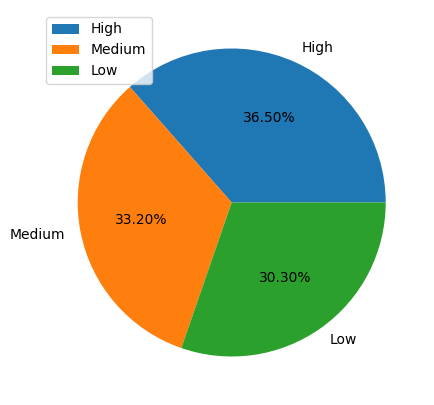

In [140]:
# Voy a ver gráficamente cómo está distribuida la variable target

plt.figure(figsize=(15,5))
sizes = df[target].value_counts()
labels = sizes.index
plt.pie(sizes.values,labels=labels,autopct='%.2f%%')
plt.legend(["High", "Medium", "Low"])
plt.show()

*Tras la exploración podemos concretar que estamos frente a un problema de clasificación multiclase. Además, parece que nuestra target está bastante balanceada, aspecto que es muy positivo a la hora de obtener resultaados satisfactorios en nuestras métricas y modelos de negocio.*

### Cuarto paso: Hacer Train/Test split

In [141]:

# Voy a hacer el train/test split estratificaré con la target para que estén distribuidas homogéneamente las 3 categorias

train_set, test_set = train_test_split( df, test_size = 20, stratify = df[target], random_state = 42)

In [142]:
# Voy a comprobar si han quedado estratificadas similarmente

train_set[target].value_counts()/len(train_set) *100

Level
High      36.530612
Medium    33.163265
Low       30.306122
Name: count, dtype: float64

In [143]:
test_set[target].value_counts()/len(test_set) *100

Level
Medium    35.0
High      35.0
Low       30.0
Name: count, dtype: float64

In [144]:
# Están similares los balanceos

### Quinto paso: MiniEDA

Como nuestro dataset está limpio de nulos o faltantes y los valores de las variables categóricas están ya estandarizados, no veo necesario nada más.

### Sexto paso: Selección de features/ Feature Engineering

**_Selección visual_**

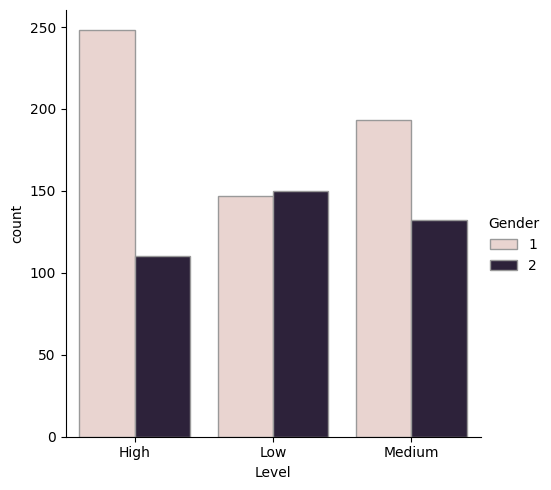

In [145]:
# Voy a realizar un análisis visual de las posibles features frente a la target para determinar si existe relación con ella, o no. No voy a usar un pairplot porque son muchísimas variables. 
# Asi que hlo aré de manera individual (variable por variable contra target)

# Target vs genero
sns.catplot( x= "Level", 
            hue = "Gender",
            kind= "count", 
            edgecolor = ".6",
            orient = "v",
            data = train_set.sort_values("Level"));

In [146]:
# Salvo en los niveles altos, parece que el género no es un determinante.

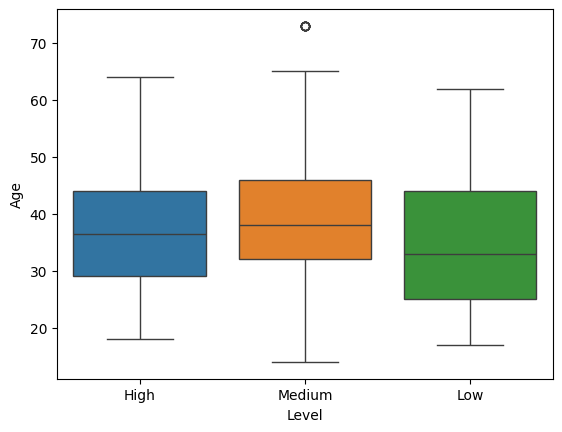

In [147]:
# Target vs age
sns.boxplot(x = "Level",
            y = "Age",
            hue = "Level",
            data = train_set);

In [148]:
# En cuanto a a la edad, las tres gráficas son similares, sí que se ve un outlier en el caso medio, habría que revisar si el dato está bien. 
# Revisando las estadisticas la edad máxima del estudio son 73 años que se corresponde con este outlier.

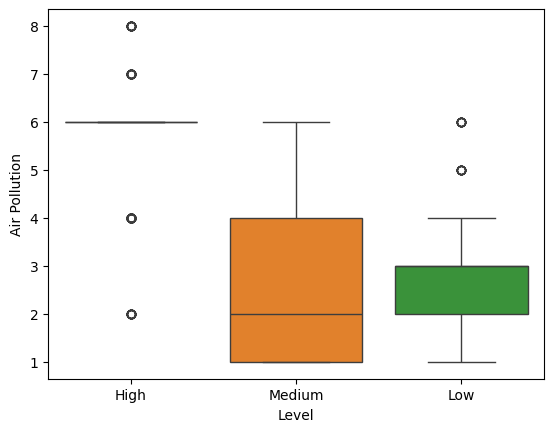

In [149]:
# Target vs Air Pollution
sns.boxplot(x = "Level",
            y = "Air Pollution",
            hue = "Level",
            data = train_set);

In [150]:
# En este caso ya observamos diferencias en relación a los tres niveles.

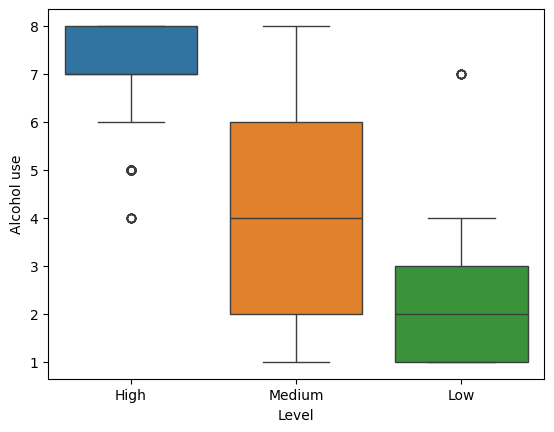

In [151]:
# Target vs Alcohol use
sns.boxplot(x = "Level",
            y = "Alcohol use",
            hue = "Level",
            data = train_set);

In [152]:
# En esta vaiable podemmos observar que parece que salvo algunos outliers que hay por ahí, a mayor consumo de alcohol, mayor nivel de "daño".

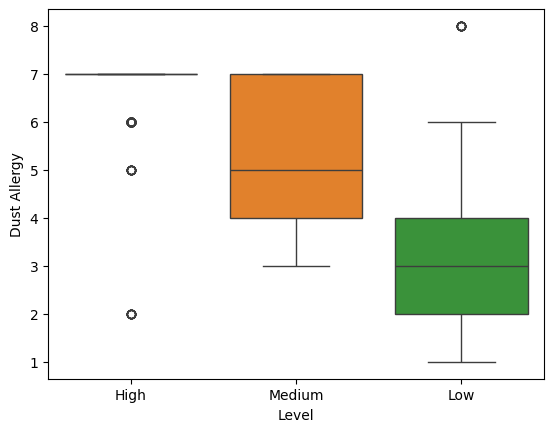

In [153]:
#Target vs Dust Allergy
sns.boxplot(x = "Level",
            y = "Dust Allergy",
            hue = "Level",
            data = train_set);

In [154]:
# Aparentemente también existe una relación, a mayor nivel de alergía al polvo, más "daño".

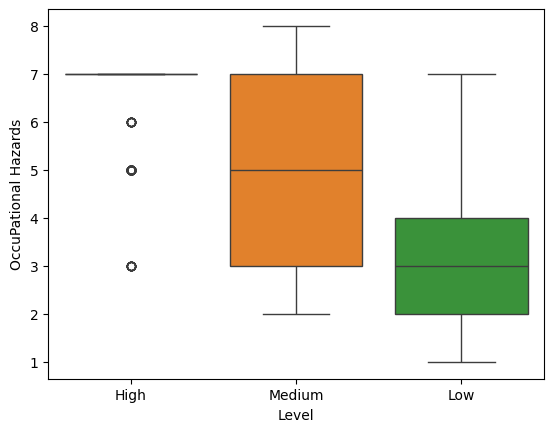

In [155]:
# Target vs Occupational Hazards
sns.boxplot(x = "Level",
            y = "OccuPational Hazards",
            hue = "Level",
            data = train_set);

In [156]:
# Distribución similar a la anterior.

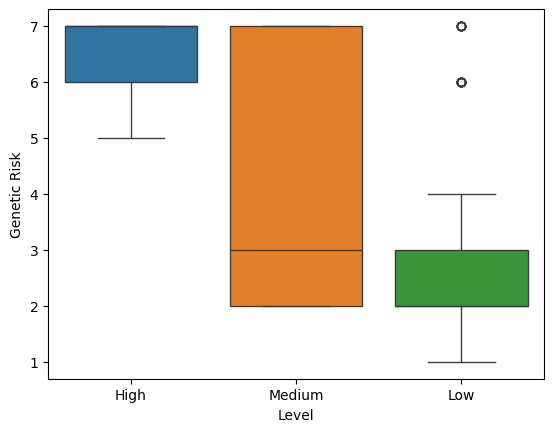

In [157]:
# Target vs Genetic risk
sns.boxplot(x = "Level",
            y = "Genetic Risk",
            hue = "Level",
            data = train_set);

In [158]:
# Parece que sí hay relación, aunque el "daño medio" afecta tanto a personas con bajo riesgo como de alto riesgo genético.

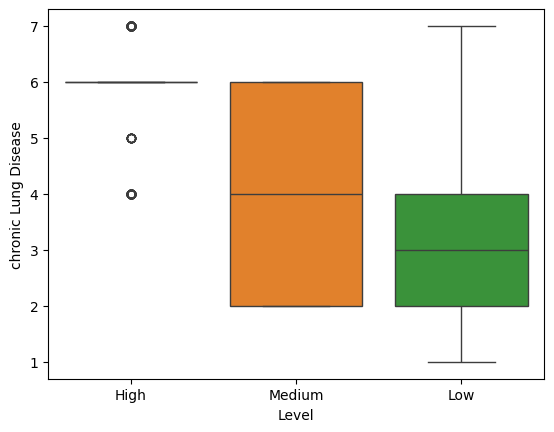

In [159]:
# Target vs Chronic Lung Disease
sns.boxplot(x = "Level",
            y = "chronic Lung Disease",
            hue = "Level",
            data = train_set);

In [160]:
# Aparentemente pueden estar relacionadas.

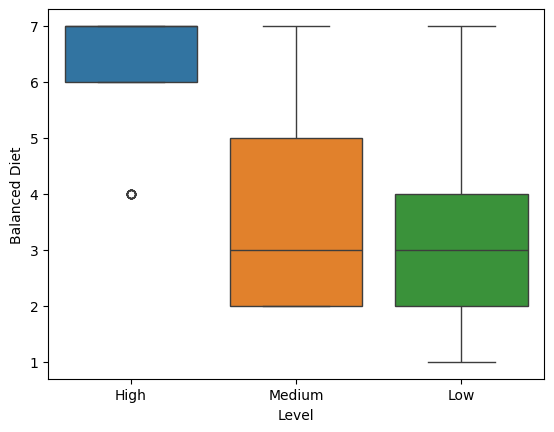

In [161]:
# Target vs Balanced Diet
sns.boxplot(x = "Level",
            y = "Balanced Diet",
            hue = "Level",
            data = train_set);

In [162]:
# De primeras parece que la dieta también influye en un mayor o menor grado de "daño", aunque hay de todo.

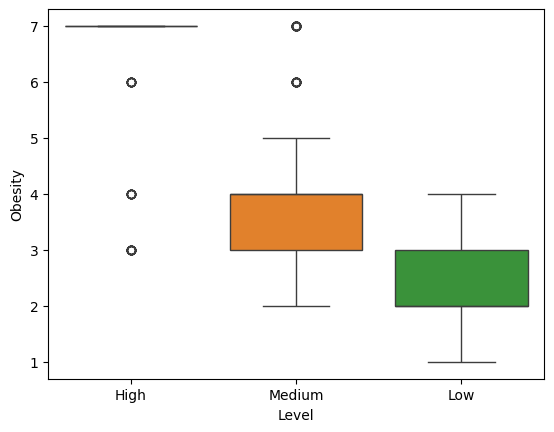

In [163]:
# Target vs Obesity 
sns.boxplot(x = "Level",
            y = "Obesity",
            hue = "Level",
            data = train_set);

In [164]:
# Parece que tiene cierta relación.

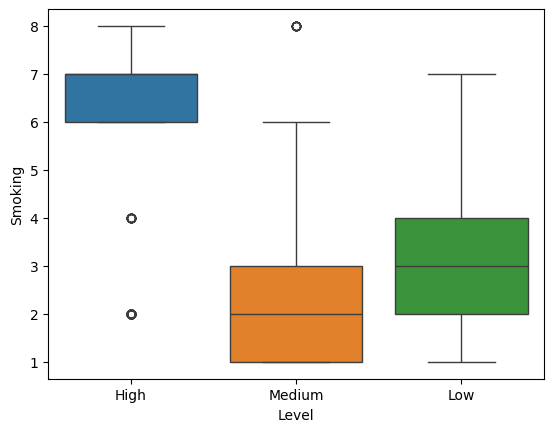

In [165]:
# Target vs Smoking
sns.boxplot(x = "Level",
            y = "Smoking",
            hue = "Level",
            data = train_set);

In [166]:
# Esta gráfica es más dispar. Parece que cuando el daño es elevado sí que hay relación con el grado de tabaquismo, pero en el medio y bajo no afecta tanto (es interesante).

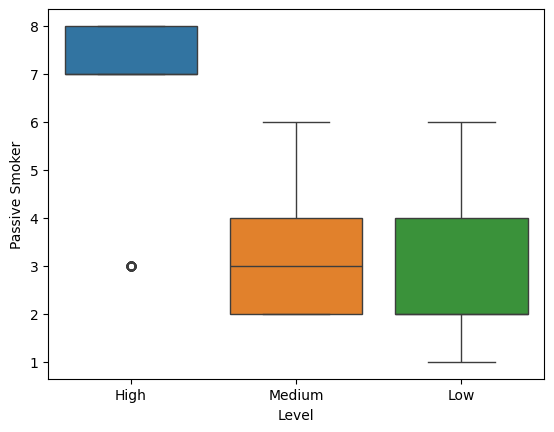

In [167]:
# Target vs Passive Smoker
sns.boxplot(x = "Level",
            y = "Passive Smoker",
            hue = "Level",
            data = train_set);

In [168]:
# Aquí la distribución también es curiosa, para fumadores pasivos muy expuestos, parece que su daño es más alto. En el caso de fumadores pasivos leves o medios, el daño es similar para ambos.

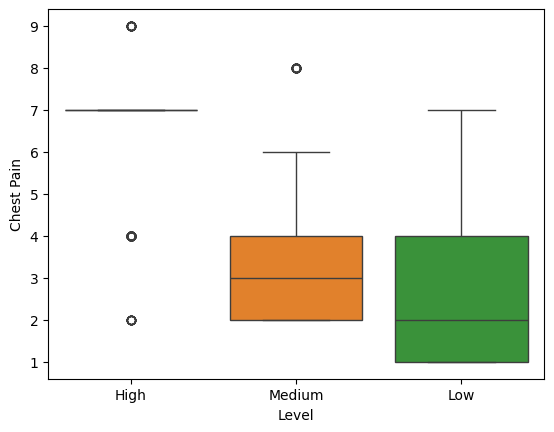

In [169]:
# Target vs Chest Pain
sns.boxplot(x = "Level",
            y = "Chest Pain",
            hue = "Level",
            data = train_set);

In [170]:
# Similar a la anterior.

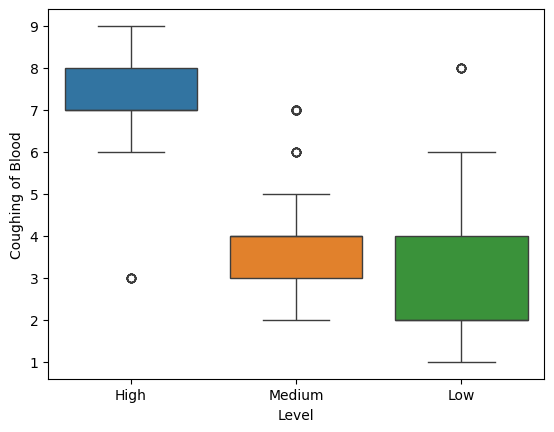

In [171]:
# Target vs Coughing of Blood
sns.boxplot(x = "Level",
            y = "Coughing of Blood",
            hue = "Level",
            data = train_set);

In [172]:
# En esta variable sí que parece tener algo más de relación con el target.

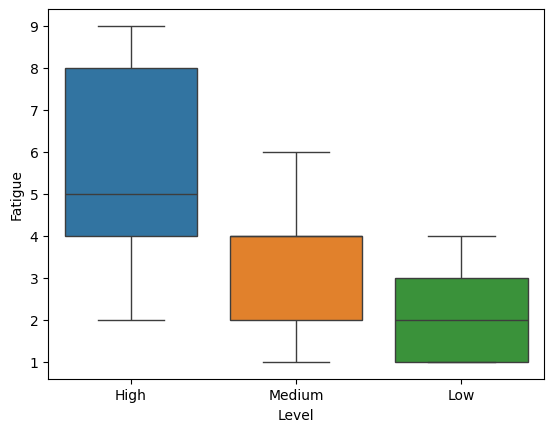

In [173]:
# Target vs Fatigue
sns.boxplot(x = "Level",
            y = "Fatigue",
            hue = "Level",
            data = train_set);

In [174]:
# La fatiga sí que parece tener una relación directa con la gravedad del daño. A mayor daño, mayor fatiga.

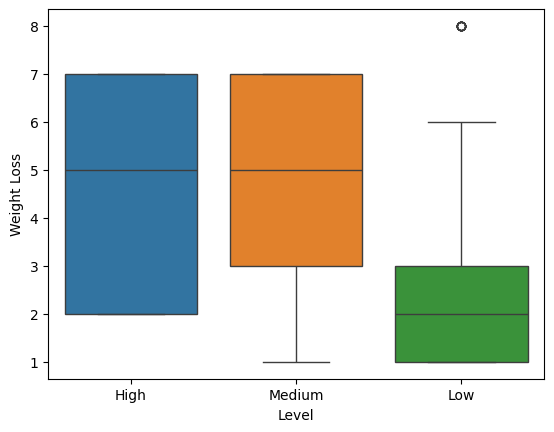

In [175]:
# Target vs Weight Loos
sns.boxplot(x = "Level",
            y = "Weight Loss",
            hue = "Level",
            data = train_set);

In [176]:
# No parecen tener mucha relación, al menos directa.

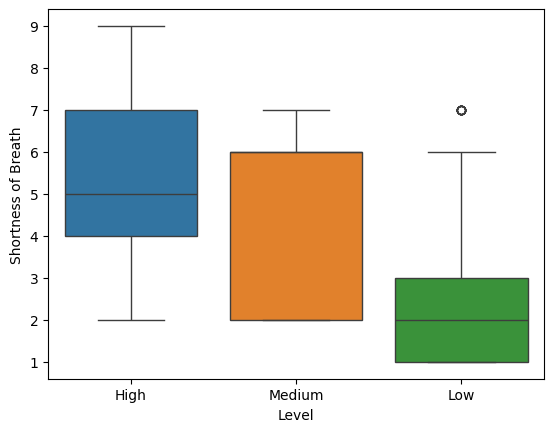

In [177]:
# Target vs Shortness of Breathe
sns.boxplot(x = "Level",
            y = "Shortness of Breath",
            hue = "Level",
            data = train_set);

In [178]:
# La disnea o dificultad respiratoria sí que tiene relación directa con el grado de daño.

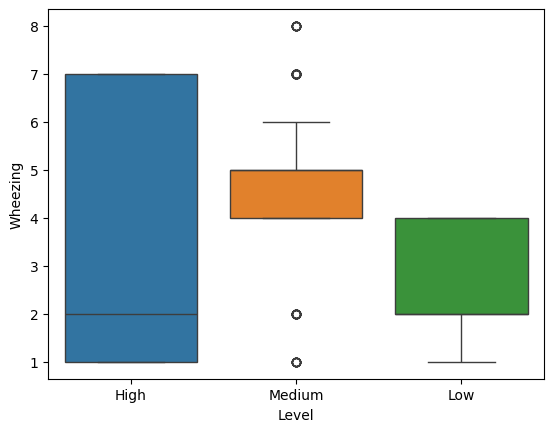

In [179]:
# Target vs Wheezing
sns.boxplot(x = "Level",
            y = "Wheezing",
            hue = "Level",
            data = train_set);

In [180]:
# La sibilación (que suele estar relacionada con el asma), no parece tener tanta relación con el grado de daño en este cáncer.

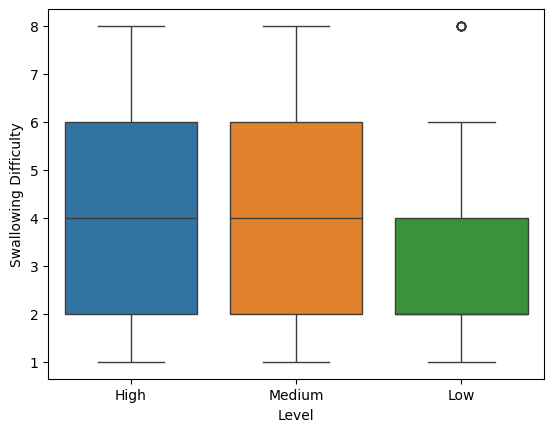

In [181]:
# Target vs Swallowing Difficulty
sns.boxplot(x = "Level",
            y = "Swallowing Difficulty",
            hue = "Level",
            data = train_set);

In [182]:
# Aquí tampoco veo una relación como tal. Todos los grados de daño se ven afectados de manera similar por la disfagia.

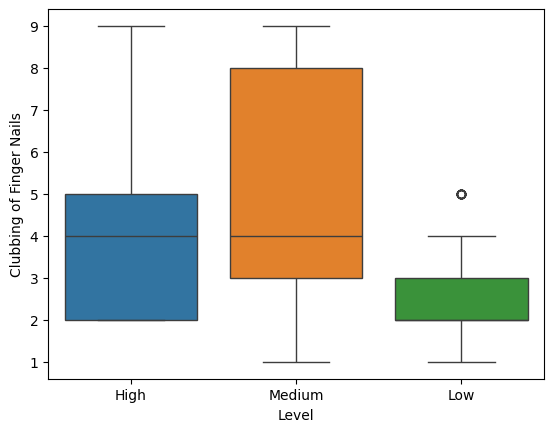

In [183]:
# Target vs Clubbing of Finger Nails
sns.boxplot(x = "Level",
            y = "Clubbing of Finger Nails",
            hue = "Level",
            data = train_set);

In [184]:
# Los dedos en palillo de tambor (que al parecer puede ser un signo de diagnóstico en enfermedades pulmonares o cardiacas entre otros), en este caso no parece tener una relación directa. 
# Parece que afecta algo más a los casos de daño medio, pero los de bajo daño y alto daño también lo tienen.

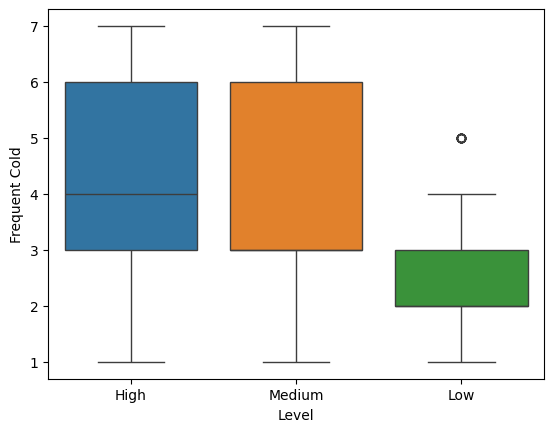

In [185]:
# Target vs Frequent Cold
sns.boxplot(x = "Level",
            y = "Frequent Cold",
            hue = "Level",
            data = train_set);

In [186]:
# En esta variable, la frecuencia de padecer catarros aparentemente no tiene una relación muy directa con los grados de daño del cáncer. 

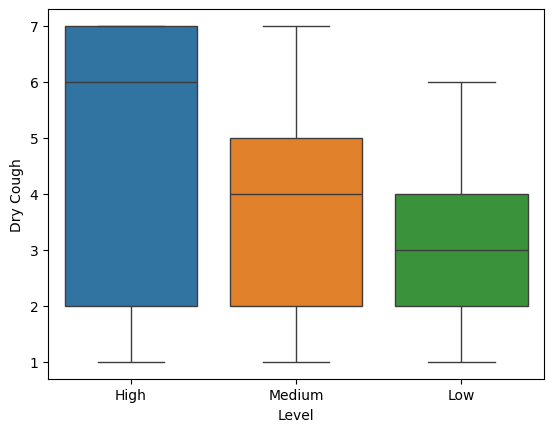

In [187]:
# Target vs Dry Cough
sns.boxplot(x = "Level",
            y = "Dry Cough",
            hue = "Level",
            data = train_set);

In [188]:
# En cuanto a la tos seca, parece que sí hay una relación con la gravedad del daño, aunque puede ser discreta.

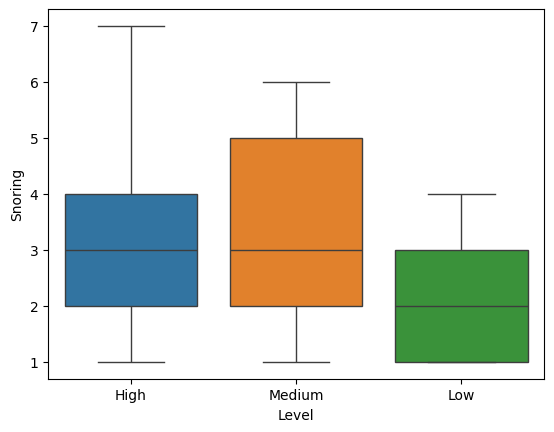

In [189]:
# Target vs Snoring
sns.boxplot(x = "Level",
            y = "Snoring",
            hue = "Level",
            data = train_set);

In [190]:
# En relación a los ronquidos, podría intuirse una ligera relación, pero no me queda del todo clara.

*Debido a que el análisis visual de todas las variables frente al target, en algunos casos no deja clara esa posible relación, voy a realizar análisis matemáticos para poder ver con datos numéricos esa posible relación.*

**_Selección estadística_**

*Nuestras variables son categóricas aunque su dtype sea int, se podrían tratar como variables numéricas, y por los datos que tenemos y la presentación de los mismos, podría inferir que son numéricas contínuas.*
*Sin embargo, voy a tratarlas como categóricas sin más, ya que no considero que el "grado 2" sea el doble "dañino" o el doble de relevante que el "grado 1.*
*Voy, por tanto a  realizar test Chi cuadrado con nuestra target para ver la posible relación entre variables categóricas y target.*

In [191]:
# Primero creo una lista con las variables categoricas

features_cat = train_set.columns.to_list()
features_cat.remove(target) # quito la target
features_cat.remove('Age') # quito la única numérica que tenemos
features_cat

['Gender',
 'Air Pollution',
 'Alcohol use',
 'Dust Allergy',
 'OccuPational Hazards',
 'Genetic Risk',
 'chronic Lung Disease',
 'Balanced Diet',
 'Obesity',
 'Smoking',
 'Passive Smoker',
 'Chest Pain',
 'Coughing of Blood',
 'Fatigue',
 'Weight Loss',
 'Shortness of Breath',
 'Wheezing',
 'Swallowing Difficulty',
 'Clubbing of Finger Nails',
 'Frequent Cold',
 'Dry Cough',
 'Snoring']

In [192]:
# Nuestra única feature numérica es edad

feature_num = train_set['Age']

In [193]:
# Ahora hago la prueba de chi-cuadrado para las variables categóricas y ver qué correlación tienen.

target_col = train_set[target] # asigno nuestra target
p_value = 0.05 # asigno el valor de p_value para aceptar o rechazar la hipótesis nula
listado_features = [] # lista vacía dónde iré añadiendo las features que tengan relación con mi target 
listado_p_value = [] # lista vacía dónde iré añadiendo los valores de p_value de aquellas features que tengan relación con mi target 
for col in train_set[features_cat].columns:
            tabla = pd.crosstab (train_set[col], target_col) 
            resultado_test = chi2_contingency(tabla)
            if resultado_test[1] < p_value:
                listado_features.append(col)
                listado_p_value.append(resultado_test[1])

In [194]:
# Ya tengo guardadas las features relacionadas con la target y sus p_value (features categoricas)

In [195]:
# Hacemos un test ANOVA para la edad

level_cat = train_set[target].unique()  # Obtener los valores únicos de la columna categórica,
age_for_level = [train_set[train_set[target] == categoria]['Age'] for categoria in level_cat] # obtenemos la edad por cada nivel de daño y los incluimos en una lista

In [196]:
f_val, p_val = stats.f_oneway(*age_for_level) 
print("Valor F:", f_val)
print("Valor p:", p_val)

Valor F: 6.111818745192272
Valor p: 0.0023021749243392767


In [197]:
# Añadimos la edad a nuestro listado, puesto que p_val es < que p_value y hacemos un dataframe

listado_features.append('Age')
listado_p_value.append(p_val)
stadistic_df = pd.DataFrame( {'Features': listado_features, 'p_value': listado_p_value})
stadistic_df = stadistic_df.sort_values(by='p_value').reset_index(drop=True) # ordeno de mayor a menor importancia las features
stadistic_df

Features        p_value
0          Coughing of Blood  3.811491e-206
1                    Obesity  1.043678e-196
2             Passive Smoker  6.402755e-195
3                   Wheezing  2.551694e-176
4                 Chest Pain  3.808708e-173
5                Alcohol use  4.148720e-173
6        Shortness of Breath  4.408441e-163
7              Balanced Diet  4.102820e-156
8               Dust Allergy  1.436697e-143
9       OccuPational Hazards  6.009067e-137
10                   Smoking  1.458214e-134
11                   Fatigue  2.310933e-130
12             Air Pollution  3.487271e-129
13              Genetic Risk  1.958855e-124
14      chronic Lung Disease  3.991984e-114
15             Frequent Cold   3.397731e-91
16  Clubbing of Finger Nails   2.306454e-86
17                 Dry Cough   1.251395e-78
18               Weight Loss   1.191414e-67
19     Swallowing Difficulty   1.059162e-44
20                   Snoring   8.841331e-34
21                    Gender   1.728489e-06
22                       Age   2.302175e-03

In [198]:
# Según la prueba de chi-cuadrado y el ANOVA parece que todas las variables tienen algo de relación con el target
# Voy a sacar listado

features_stad = stadistic_df['Features'].to_list()
features_stad

['Coughing of Blood',
 'Obesity',
 'Passive Smoker',
 'Wheezing',
 'Chest Pain',
 'Alcohol use',
 'Shortness of Breath',
 'Balanced Diet',
 'Dust Allergy',
 'OccuPational Hazards',
 'Smoking',
 'Fatigue',
 'Air Pollution',
 'Genetic Risk',
 'chronic Lung Disease',
 'Frequent Cold',
 'Clubbing of Finger Nails',
 'Dry Cough',
 'Weight Loss',
 'Swallowing Difficulty',
 'Snoring',
 'Gender',
 'Age']

In [199]:
# Por lo tanto, tras el análisis estadistico, iré con todas las features de primeras. Veré que arroja el resto de posibilidades de elección.

**_Selección Mutual Information_**

In [200]:
# Realizamos el mutual information clasificación para ver todas las relaciones

listado_features = train_set.columns.to_list()
listado_features.remove(target) # quitamos el target de la lista de features

mi = mutual_info_classif(train_set[listado_features], train_set[target]) # valor obtenido por el mutual information
mi_df = pd.DataFrame({'Feature': train_set[listado_features].columns, 'Mutual Information': mi}) # creo un dataframe con los resultados de mutual information
mi_df = mi_df.sort_values(by='Mutual Information', ascending=False).reset_index(drop=True) # ordeno de mayor a menor importancia las features
mi_df


Feature  Mutual Information
0             Passive Smoker            0.603597
1          Coughing of Blood            0.593882
2                    Obesity            0.566563
3                Alcohol use            0.541502
4                   Wheezing            0.512362
5                 Chest Pain            0.485088
6              Balanced Diet            0.479254
7               Dust Allergy            0.453945
8        Shortness of Breath            0.445625
9                    Smoking            0.421472
10      OccuPational Hazards            0.411406
11              Genetic Risk            0.408260
12      chronic Lung Disease            0.389624
13                   Fatigue            0.385469
14             Air Pollution            0.377654
15                       Age            0.327286
16  Clubbing of Finger Nails            0.291611
17             Frequent Cold            0.277921
18               Weight Loss            0.277446
19                 Dry Cough            0.265147
20     Swallowing Difficulty            0.109956
21                   Snoring            0.084210
22                    Gender            0.011341

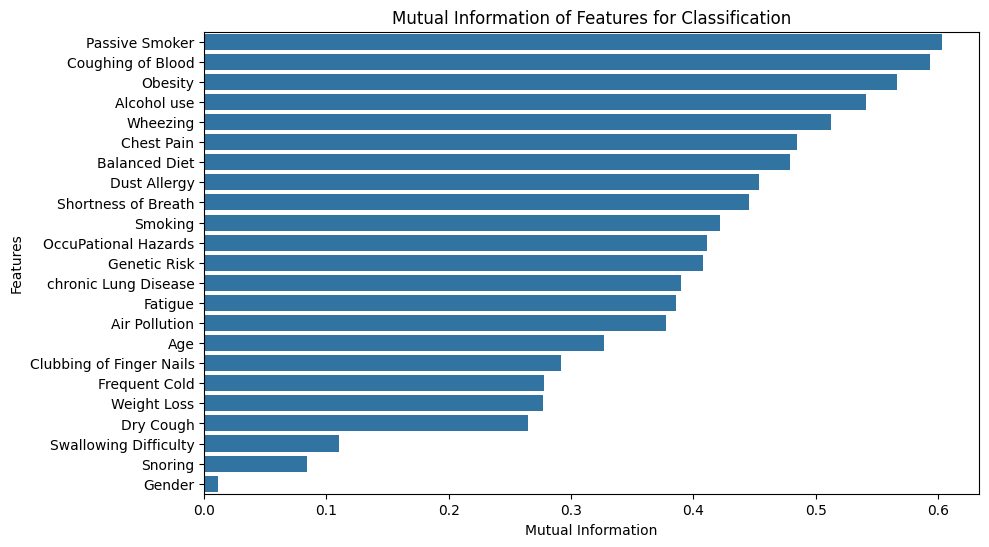

In [201]:
# Voy a ponerlo graficamente

plt.figure(figsize=(10,6))
sns.barplot(x='Mutual Information',y='Feature', data=mi_df)
plt.title('Mutual Information of Features for Classification')
plt.xlabel('Mutual Information')
plt.ylabel('Features')
plt.show()

In [202]:
# Según el mutual information, la única variable que no tendría relación es el género. Aunque se puede poner un límite en valores < 0,1
# Voy a crear un listado de las variables seleccionadas por el mutual information.

condicion = mi_df['Mutual Information'] > 0.1
features_mi = mi_df.loc[condicion, 'Feature'].to_list()
features_mi

['Passive Smoker',
 'Coughing of Blood',
 'Obesity',
 'Alcohol use',
 'Wheezing',
 'Chest Pain',
 'Balanced Diet',
 'Dust Allergy',
 'Shortness of Breath',
 'Smoking',
 'OccuPational Hazards',
 'Genetic Risk',
 'chronic Lung Disease',
 'Fatigue',
 'Air Pollution',
 'Age',
 'Clubbing of Finger Nails',
 'Frequent Cold',
 'Weight Loss',
 'Dry Cough',
 'Swallowing Difficulty']

**_Seleción por Modelo_**

In [203]:
# Voy a usar la seleccion de features por modelo. Para eso uso el Random Forest de manera automática y luego veré si me dan las mismas features si lo hago de forma manual.

rf_selector = RandomForestClassifier(random_state= 42, class_weight= "balanced") 

selector_modelo = SelectFromModel(estimator = rf_selector, threshold="median") # Nos quedamos con la mediana

selector_modelo.fit(train_set[listado_features], train_set[target]) 
features_modelo = list(selector_modelo.get_feature_names_out())
features_modelo

['Alcohol use',
 'Dust Allergy',
 'Balanced Diet',
 'Obesity',
 'Smoking',
 'Passive Smoker',
 'Chest Pain',
 'Coughing of Blood',
 'Fatigue',
 'Wheezing',
 'Swallowing Difficulty',
 'Clubbing of Finger Nails']

In [204]:
# De forma manual
rf_check = RandomForestClassifier(random_state= 42, class_weight= "balanced")

rf_check.fit(train_set[listado_features], train_set[target])

df_importance= pd.DataFrame(rf_check.feature_importances_, columns = ["importance"], index = listado_features).sort_values("importance",ascending = False)
df_importance

importance
Coughing of Blood           0.099784
Obesity                     0.098918
Wheezing                    0.094752
Passive Smoker              0.078466
Chest Pain                  0.052965
Fatigue                     0.051520
Balanced Diet               0.045328
Alcohol use                 0.044283
Swallowing Difficulty       0.044089
Smoking                     0.043334
Dust Allergy                0.041295
Clubbing of Finger Nails    0.038880
OccuPational Hazards        0.038780
Shortness of Breath         0.036123
Snoring                     0.034247
Air Pollution               0.033057
Genetic Risk                0.032036
Frequent Cold               0.031338
Weight Loss                 0.026486
chronic Lung Disease        0.015084
Dry Cough                   0.013800
Age                         0.005286
Gender                      0.000148

In [205]:
# Cortamos por la mediana

df_importance.importance.median()

np.float64(0.03888029181211212)

In [206]:
df_importance[df_importance.importance > df_importance.importance.median()]

importance
Coughing of Blood        0.099784
Obesity                  0.098918
Wheezing                 0.094752
Passive Smoker           0.078466
Chest Pain               0.052965
Fatigue                  0.051520
Balanced Diet            0.045328
Alcohol use              0.044283
Swallowing Difficulty    0.044089
Smoking                  0.043334
Dust Allergy             0.041295

In [207]:
# Hacemos listado de features modelo manual

features_manual = df_importance[df_importance.importance > df_importance.importance.median()].index.to_list()
features_manual 

['Coughing of Blood',
 'Obesity',
 'Wheezing',
 'Passive Smoker',
 'Chest Pain',
 'Fatigue',
 'Balanced Diet',
 'Alcohol use',
 'Swallowing Difficulty',
 'Smoking',
 'Dust Allergy']

In [208]:
# Parece que aunque seleccionemos por modelo, tengo dos listas con diferentes features, o al menos con diferente peso.

**_Selección RFE_**

In [209]:
# Voy a probar con RFE, me quedaré con 12 features, que son la mitad de las que tengo y ya me parece una buena reducción.

rf_RFE = RandomForestClassifier(random_state= 42, class_weight= "balanced")
rfe = RFE (estimator = rf_RFE, n_features_to_select= 12, step = 1) # Iterará hasta quedarse con 12

rfe.fit(train_set[listado_features], train_set[target]) # entrenamos

RFE(estimator=RandomForestClassifier(class_weight='balanced', random_state=42),
    n_features_to_select=12)

In [210]:
# Obtengo el listado con los nombres de las features seleccionadas.

features_RFE = list(rfe.get_feature_names_out())
features_RFE

['Air Pollution',
 'Alcohol use',
 'Dust Allergy',
 'Balanced Diet',
 'Obesity',
 'Smoking',
 'Passive Smoker',
 'Coughing of Blood',
 'Fatigue',
 'Wheezing',
 'Clubbing of Finger Nails',
 'Snoring']

**_Selección SFS_**

In [211]:
# Ahora voy a probar con SFS, también escogeré 12, por el mismo motivo que antes.

rf_SFS = RandomForestClassifier(class_weight= "balanced", random_state = 42)
sfs_forward = SequentialFeatureSelector(rf_SFS,
                                        n_features_to_select = 12, # número de features a escoger
                                        cv = 4,
                                        scoring = "balanced_accuracy", 
                                        n_jobs = -1)

sfs_forward.fit(train_set[listado_features], train_set[target]) # entrenamos

SequentialFeatureSelector(cv=4,
                          estimator=RandomForestClassifier(class_weight='balanced',
                                                           random_state=42),
                          n_features_to_select=12, n_jobs=-1,
                          scoring='balanced_accuracy')

In [212]:
# Obtención del listado de las features por SFS.

features_SFS = list(sfs_forward.get_feature_names_out())
features_SFS

['Age',
 'Gender',
 'Air Pollution',
 'Alcohol use',
 'Dust Allergy',
 'OccuPational Hazards',
 'Genetic Risk',
 'chronic Lung Disease',
 'Balanced Diet',
 'Obesity',
 'Coughing of Blood',
 'Wheezing']

In [213]:
# Curioso, ya que la edad en la mayoria de seleccion de features está descartada, al igual que el género , que aparentemente tienen menos peso

**_Selección por Hard-Voting_**

In [214]:
# Finalmente voy a hacer un hard-voting, escogiendo las 12 features más votadas, por reducir a la mitad las features seleccionadas, veamos que sale.

lista_total = features_stad + features_mi + features_manual + features_modelo + features_RFE + features_SFS
votaciones = Counter(lista_total)
votaciones

Counter({'Coughing of Blood': 6,
         'Obesity': 6,
         'Wheezing': 6,
         'Alcohol use': 6,
         'Balanced Diet': 6,
         'Dust Allergy': 6,
         'Passive Smoker': 5,
         'Smoking': 5,
         'Fatigue': 5,
         'Chest Pain': 4,
         'Air Pollution': 4,
         'Clubbing of Finger Nails': 4,
         'Swallowing Difficulty': 4,
         'OccuPational Hazards': 3,
         'Genetic Risk': 3,
         'chronic Lung Disease': 3,
         'Age': 3,
         'Shortness of Breath': 2,
         'Frequent Cold': 2,
         'Dry Cough': 2,
         'Weight Loss': 2,
         'Snoring': 2,
         'Gender': 2})

In [215]:
# Ganadores del hard-voting

escrutinio = pd.DataFrame(votaciones.values(), columns = ["Votos"], index = votaciones.keys()).sort_values("Votos", ascending = False)
escrutinio

Votos
Coughing of Blood             6
Obesity                       6
Wheezing                      6
Alcohol use                   6
Balanced Diet                 6
Dust Allergy                  6
Passive Smoker                5
Smoking                       5
Fatigue                       5
Air Pollution                 4
Chest Pain                    4
Swallowing Difficulty         4
Clubbing of Finger Nails      4
chronic Lung Disease          3
OccuPational Hazards          3
Age                           3
Genetic Risk                  3
Shortness of Breath           2
Frequent Cold                 2
Weight Loss                   2
Dry Cough                     2
Snoring                       2
Gender                        2

In [216]:
# Listado de features por hard-voting.

features_hard_voting = escrutinio["Votos"].nlargest(12).index.to_list()
features_hard_voting

['Coughing of Blood',
 'Obesity',
 'Wheezing',
 'Alcohol use',
 'Balanced Diet',
 'Dust Allergy',
 'Passive Smoker',
 'Smoking',
 'Fatigue',
 'Air Pollution',
 'Chest Pain',
 'Swallowing Difficulty']

## Séptimo paso: Baseline de Modelos y Validación cruzada

In [217]:
# Voy a hacer los splits correspondientes antes de modelar.

X_train = train_set[listado_features]
y_train = train_set[target]

X_test = test_set[listado_features]
y_test = test_set [target]


In [218]:
# Ojo, para la regresión lineal y para SVC necesitamos scalar las varibles.

scaler = StandardScaler()
scaler.fit(train_set[listado_features]) # Adaptamos el StandarScaler al Train, pero luego usamos el mismo en el test (porque ya la media y la desviación son las del train)
X_train_scalado = pd.DataFrame(scaler.transform(train_set[listado_features]), columns = listado_features)
X_test_scalado = pd.DataFrame(scaler.transform(test_set[listado_features]), columns= listado_features)
X_train_scalado.describe()

Age        Gender  Air Pollution   Alcohol use  Dust Allergy  \
count  9.800000e+02  9.800000e+02   9.800000e+02  9.800000e+02  9.800000e+02   
mean   8.247371e-17  1.749168e-16   1.232574e-16  3.443957e-17 -1.622285e-16   
std    1.000511e+00  1.000511e+00   1.000511e+00  1.000511e+00  1.000511e+00   
min   -1.933838e+00 -8.164966e-01  -1.399085e+00 -1.362645e+00 -2.121869e+00   
25%   -7.862922e-01 -8.164966e-01  -9.071209e-01 -9.812133e-01 -5.988477e-01   
50%   -9.776492e-02 -8.164966e-01  -4.151571e-01  1.630815e-01  4.164996e-01   
75%    6.533558e-01  1.224745e+00   1.060734e+00  9.259446e-01  9.241732e-01   
max    2.990176e+00  1.224745e+00   2.044661e+00  1.307376e+00  1.431847e+00   

       OccuPational Hazards  Genetic Risk  chronic Lung Disease  \
count          9.800000e+02  9.800000e+02          9.800000e+02   
mean           5.165936e-17 -1.123818e-16         -3.081435e-17   
std            1.000511e+00  1.000511e+00          1.000511e+00   
min           -1.828445e+00 -1.690121e+00         -1.829155e+00   
25%           -8.791068e-01 -7.484958e-01         -7.476637e-01   
50%            7.023167e-02  1.931292e-01         -2.069180e-01   
75%            1.019570e+00  1.134754e+00          8.745734e-01   
max            1.494239e+00  1.134754e+00          1.415319e+00   

       Balanced Diet       Obesity  ...  Coughing of Blood       Fatigue  \
count   9.800000e+02  9.800000e+02  ...       9.800000e+02  9.800000e+02   
mean    9.788089e-17 -2.447022e-17  ...       1.450087e-17  1.232574e-16   
std     1.000511e+00  1.000511e+00  ...       1.000511e+00  1.000511e+00   
min    -1.637301e+00 -1.637426e+00  ...      -1.581522e+00 -1.271010e+00   
25%    -1.169228e+00 -6.937754e-01  ...      -7.606051e-01 -8.247220e-01   
50%    -2.330814e-01 -2.219504e-01  ...      -3.501464e-01 -3.784340e-01   
75%     1.171138e+00  1.193525e+00  ...       8.812297e-01  5.141420e-01   
max     1.171138e+00  1.193525e+00  ...       1.702147e+00  2.299294e+00   

        Weight Loss  Shortness of Breath      Wheezing  Swallowing Difficulty  \
count  9.800000e+02         9.800000e+02  9.800000e+02           9.800000e+02   
mean  -9.063045e-18        -1.087565e-16 -5.800349e-17          -5.437827e-18   
std    1.000511e+00         1.000511e+00  1.000511e+00           1.000511e+00   
min   -1.289456e+00        -1.423090e+00 -1.359062e+00          -1.203532e+00   
25%   -8.363661e-01        -9.845278e-01 -8.688595e-01          -7.629412e-01   
50%   -3.832767e-01        -1.074030e-01  1.115461e-01           1.182402e-01   
75%    9.759917e-01         7.697217e-01  6.017489e-01           5.588309e-01   
max    1.882171e+00         2.085409e+00  2.072357e+00           1.880603e+00   

       Clubbing of Finger Nails  Frequent Cold     Dry Cough       Snoring  
count              9.800000e+02   9.800000e+02  9.800000e+02  9.800000e+02  
mean              -1.993870e-17  -1.468213e-16  5.687061e-17 -4.440892e-17  
std                1.000511e+00   1.000511e+00  1.000511e+00  1.000511e+00  
min               -1.227275e+00  -1.383836e+00 -1.396984e+00 -1.306084e+00  
25%               -8.083515e-01  -8.378779e-01 -9.076898e-01 -6.295713e-01  
50%                2.949564e-02  -2.919202e-01  7.089766e-02  4.694172e-02  
75%                4.484192e-01   7.999952e-01  1.049485e+00  7.234547e-01  
max                2.124114e+00   1.891911e+00  1.538779e+00  2.752994e+00  

[8 rows x 23 columns]

In [219]:
# Empezamos con el modelado general.
# Aquí voy a ignorar la regresión lineal y el SVC por el tema del escalado, luego haré un proceso similar con estos dos modelos.

nombres = [f"Seleccion {nombre}" for nombre in ["estadistico", "mutual information", "manual", "modelo", "rfe", "sfs", "voting"]]
model_names = ["Random Forest", "KNN", " Decission Tree", "AdaBoost", "LightGBM", "Catboost"]

# Instanciamos los diferentes modelos de clasificación que voy a usar.

rf_clf = RandomForestClassifier(class_weight= "balanced", random_state= 42)
knn_clf = KNeighborsClassifier(weights= "uniform", n_jobs= -1)
dt_clf = DecisionTreeClassifier(class_weight = "balanced", random_state = 42) 
ada_clf = AdaBoostClassifier(random_state = 42)
lgb_clf = LGBMClassifier(class_weight= "balanced", random_state = 42, verbose = -100, n_jobs= -1)
cb_clf = CatBoostClassifier(random_state = 42)


models = [rf_clf, knn_clf, dt_clf, ada_clf, lgb_clf, cb_clf] # listado de modelos
resultados = [] # Lista donde almacenaremos los resultados de la métricaa de cada modelo con cada grupo de features usadas

# Realizamos prueba de validación cruzada

for indice, lista in enumerate([features_stad, features_mi, features_manual, features_modelo, features_RFE, features_SFS, features_hard_voting]): # le pasamos el conjunto de cada lista de features seleccionadas
    X_train_modelos = train_set[lista]
    y_train_modelos = y_train
    
    for model_name, modelo in zip(model_names, models):
        metrica = np.mean(cross_val_score(modelo, X_train_modelos, y_train_modelos, cv = 5, scoring = "balanced_accuracy")) # obtenemos la métrica de la valoración cruzada
        data = {
            "features_list": nombres[indice],
            "model": model_name,
            "avg. recall": metrica
        }
        print(data)
        resultados.append(data.copy())
df_resultados = pd.DataFrame(resultados) # paso los resultados a un dataframe
df_resultados.sort_values("avg. recall", ascending = False) # oredenamos de mejor a peor métrica

{'features_list': 'Seleccion estadistico', 'model': 'Random Forest', 'avg. recall': np.float64(1.0)}
{'features_list': 'Seleccion estadistico', 'model': 'KNN', 'avg. recall': np.float64(0.9977401129943504)}
{'features_list': 'Seleccion estadistico', 'model': ' Decission Tree', 'avg. recall': np.float64(1.0)}
{'features_list': 'Seleccion estadistico', 'model': 'AdaBoost', 'avg. recall': np.float64(0.9611806460959003)}
{'features_list': 'Seleccion estadistico', 'model': 'LightGBM', 'avg. recall': np.float64(1.0)}
Learning rate set to 0.078151
0:	learn: 0.9815316	total: 1.31ms	remaining: 1.31s
1:	learn: 0.8853657	total: 2.38ms	remaining: 1.19s
2:	learn: 0.8033016	total: 3.2ms	remaining: 1.06s
3:	learn: 0.7306817	total: 4.28ms	remaining: 1.06s
4:	learn: 0.6681246	total: 5.21ms	remaining: 1.04s
5:	learn: 0.6170800	total: 6.15ms	remaining: 1.02s
6:	learn: 0.5664905	total: 7.04ms	remaining: 999ms
7:	learn: 0.5264849	total: 8ms	remaining: 992ms
8:	learn: 0.4901864	total: 8.93ms	remaining: 983m

features_list            model  avg. recall
0          Seleccion estadistico    Random Forest     1.000000
2          Seleccion estadistico   Decission Tree     1.000000
8   Seleccion mutual information   Decission Tree     1.000000
4          Seleccion estadistico         LightGBM     1.000000
5          Seleccion estadistico         Catboost     1.000000
6   Seleccion mutual information    Random Forest     1.000000
13              Seleccion manual              KNN     1.000000
12              Seleccion manual    Random Forest     1.000000
11  Seleccion mutual information         Catboost     1.000000
10  Seleccion mutual information         LightGBM     1.000000
41              Seleccion voting         Catboost     1.000000
40              Seleccion voting         LightGBM     1.000000
29                 Seleccion rfe         Catboost     1.000000
30                 Seleccion sfs    Random Forest     1.000000
14              Seleccion manual   Decission Tree     1.000000
16              Seleccion manual         LightGBM     1.000000
17              Seleccion manual         Catboost     1.000000
18              Seleccion modelo    Random Forest     1.000000
24                 Seleccion rfe    Random Forest     1.000000
19              Seleccion modelo              KNN     1.000000
20              Seleccion modelo   Decission Tree     1.000000
22              Seleccion modelo         LightGBM     1.000000
25                 Seleccion rfe              KNN     1.000000
23              Seleccion modelo         Catboost     1.000000
28                 Seleccion rfe         LightGBM     1.000000
26                 Seleccion rfe   Decission Tree     1.000000
38              Seleccion voting   Decission Tree     1.000000
37              Seleccion voting              KNN     1.000000
36              Seleccion voting    Random Forest     1.000000
35                 Seleccion sfs         Catboost     1.000000
32                 Seleccion sfs   Decission Tree     1.000000
34                 Seleccion sfs         LightGBM     0.998974
1          Seleccion estadistico              KNN     0.997740
7   Seleccion mutual information              KNN     0.996610
31                 Seleccion sfs              KNN     0.992509
15              Seleccion manual         AdaBoost     0.971352
21              Seleccion modelo         AdaBoost     0.971352
9   Seleccion mutual information         AdaBoost     0.970753
39              Seleccion voting         AdaBoost     0.970326
27                 Seleccion rfe         AdaBoost     0.970326
3          Seleccion estadistico         AdaBoost     0.961181
33                 Seleccion sfs         AdaBoost     0.951992

In [220]:
# Hay muchos que me dan 1, lo que me lleva a pensar que están sobreajustados, asi que voy a quedarme con los primeros modelos después de las métricas de 1, 
# por ahora con lgbm y la seleccion de SFS, y también con KNN seleccion mutual information

In [221]:
# Voy a hacer el crossvalidation con la regresion lineal y el SVC

nombres = [f"Seleccion {nombre}" for nombre in ["estadistico", "mutual information", "manual", "modelo", "rfe", "sfs", "voting"]]
model_names_scaled = ["Logistic Regressor", "SVC"]

# Instanciamos los modelos

lr_clf = LogisticRegression(class_weight= "balanced", random_state= 42)
SVC_clf = SVC (class_weight = "balanced", random_state = 42)

models_scaled = [lr_clf, SVC_clf]
resultados_scaled = [] # listado de resultados de la métrica de valoración cruzada

for indice, lista in enumerate([features_stad, features_mi, features_manual, features_modelo, features_RFE, features_SFS, features_hard_voting]): # listado con cada seleccion de features
    X_train_modelos_2 = X_train_scalado[lista]
    y_train_modelos_2 = y_train
    
    for model_name_scaled, modelo in zip(model_names_scaled, models_scaled):
        metrica = np.mean(cross_val_score(modelo, X_train_modelos_2, y_train_modelos_2, cv = 5, scoring = "balanced_accuracy")) # validadción cruzada
        data = {
            "features_list": nombres[indice],
            "model": model_name_scaled,
            "avg. recall": metrica
        }
        print(data)
        resultados_scaled.append(data.copy())
df_resultados_scaled = pd.DataFrame(resultados_scaled)
df_resultados_scaled.sort_values("avg. recall", ascending = False) # ordenamos de mejor a peor resultado

{'features_list': 'Seleccion estadistico', 'model': 'Logistic Regressor', 'avg. recall': np.float64(1.0)}
{'features_list': 'Seleccion estadistico', 'model': 'SVC', 'avg. recall': np.float64(1.0)}
{'features_list': 'Seleccion mutual information', 'model': 'Logistic Regressor', 'avg. recall': np.float64(1.0)}
{'features_list': 'Seleccion mutual information', 'model': 'SVC', 'avg. recall': np.float64(1.0)}
{'features_list': 'Seleccion manual', 'model': 'Logistic Regressor', 'avg. recall': np.float64(1.0)}
{'features_list': 'Seleccion manual', 'model': 'SVC', 'avg. recall': np.float64(1.0)}
{'features_list': 'Seleccion modelo', 'model': 'Logistic Regressor', 'avg. recall': np.float64(1.0)}
{'features_list': 'Seleccion modelo', 'model': 'SVC', 'avg. recall': np.float64(1.0)}
{'features_list': 'Seleccion rfe', 'model': 'Logistic Regressor', 'avg. recall': np.float64(1.0)}
{'features_list': 'Seleccion rfe', 'model': 'SVC', 'avg. recall': np.float64(1.0)}
{'features_list': 'Seleccion sfs', 'm

features_list               model  avg. recall
0          Seleccion estadistico  Logistic Regressor     1.000000
1          Seleccion estadistico                 SVC     1.000000
2   Seleccion mutual information  Logistic Regressor     1.000000
3   Seleccion mutual information                 SVC     1.000000
4               Seleccion manual  Logistic Regressor     1.000000
5               Seleccion manual                 SVC     1.000000
6               Seleccion modelo  Logistic Regressor     1.000000
7               Seleccion modelo                 SVC     1.000000
8                  Seleccion rfe  Logistic Regressor     1.000000
9                  Seleccion rfe                 SVC     1.000000
13              Seleccion voting                 SVC     1.000000
12              Seleccion voting  Logistic Regressor     1.000000
11                 Seleccion sfs                 SVC     0.990715
10                 Seleccion sfs  Logistic Regressor     0.958561

In [222]:
# Con los escalados también me dan muy buenas métricas, estará sobre ajustado????

*¿Con cuál quedarme?*

*Como no me fio de que estén sobreajustados, voy a quedarme con los tres modelos que mejor métrica tienen después de que me dan valor 1.*

*Modelos escogidos: lgbm y la seleccion de SFS, KNN seleccion mutual information y KNN seleccion SFS ( no escojo el KNN con seleccion estadistica ya que tiene la misma métrica que con seleccion mutual information)*

### Octavo paso: Optimización de Hiperparámetros

In [223]:
# Ajustando los hiperparámetros
# Lgbm con SFS

param_grid = {
    "n_estimators": [100,200],
    "learning_rate": [0.1,0.5,1],
    "max_depth": [5,10,15],
    "min_data_in_leaf": [1,10,20,100],
    "class_weight":["balanced",None]
} # optimizando

lgb_clf = LGBMClassifier(verbose = -100) # vuelvo a instanciar el modelo

lgb_grid = GridSearchCV(lgb_clf,
                       param_grid= param_grid,
                       cv = 5,
                       scoring= "balanced_accuracy",
                       n_jobs=-1)

lgb_grid.fit(X_train[features_SFS], y_train) # entreno el modelo

print(lgb_grid.best_params_) # mejores parámetros
print(lgb_grid.best_score_) # mejores métricas
nlgb = lgb_grid.best_estimator_ # escogiendo el mejor estimador

{'class_weight': 'balanced', 'learning_rate': 0.1, 'max_depth': 5, 'min_data_in_leaf': 1, 'n_estimators': 100}
1.0


In [224]:
# He conseguido optimizarlo hasta un avg.recall de 1

In [225]:
# Guardo el modelo

with open('modelo_lgbm_SFS.pkl', 'wb') as archivo: # wb = write binary
    pickle.dump(nlgb, archivo)

In [226]:
# Voy a optimizar  KNN con mutual information

params = {'n_neighbors':list(np.arange(2,50))} # optimizando 

knn_optimizado_mi = RandomizedSearchCV(knn_clf, n_jobs = -1, random_state = 42, scoring = 'accuracy', param_distributions = params,cv=10) # instancio modelo

knn_optimizado_mi.fit(X_train[features_mi],y_train) # entreno

print(knn_optimizado_mi.best_params_) # mejores parametros
print(knn_optimizado_mi.best_score_) # mejores métricas
mi_knn = knn_optimizado_mi.best_estimator_ # mejor estimador

{'n_neighbors': np.int64(6)}
0.996938775510204


In [227]:
# Ha mejorado ligeramente su métrica

In [228]:
# Guardo el modelo

with open('modelo_KNN_mi.pkl', 'wb') as archivo: # wb = write binary
    pickle.dump(mi_knn, archivo)

In [229]:
# Voy a optimizar  KNN con SFS

params = {'n_neighbors':list(np.arange(2,50))} # optimizando

knn_optimizado = RandomizedSearchCV(knn_clf, n_jobs = -1, random_state = 42, scoring = 'accuracy', param_distributions = params,cv=10) # instancio modelo

knn_optimizado.fit(X_train[features_SFS],y_train) # entrenando modelo

print(knn_optimizado.best_params_) # mejores parámetros
print(knn_optimizado.best_score_) # mejores métricas
nknn = knn_optimizado.best_estimator_ # mejor estimador

{'n_neighbors': np.int64(6)}
0.9928571428571429


In [230]:
# También ha mejorado ligeramente su métrica

In [231]:
# Guardo el modelo

with open('modelo_KNN_SFS.pkl', 'wb') as archivo: # wb = write binary
    pickle.dump(nknn, archivo)

### Noveno paso: Evaluando contra test

In [232]:
# Voy a guardar los valores para luego hacer matrices de confusion

cm_t=[] # almacen para matriiz de confusion para training set
cm=[] # almacén para matriz de confusión para test set

**_LGBM Features SFS_**

In [233]:
# Primero el Lgbm

pred_train = nlgb.predict(X_train[features_SFS]) # predicción en train
y_pred = nlgb.predict(X_test[features_SFS]) # predicción en test
print(classification_report(y_test, y_pred)) # informe de clasificación

cmrf_t = confusion_matrix(y_train, pred_train) # genero matriz de confusión para train
cm_t.append(cmrf_t) # guardo los datos de train

cmrf = confusion_matrix(y_test, y_pred) # genero matriz de confusión para test
cm.append(cmrf) # guardo los datos de test

              precision    recall  f1-score   support

        High       1.00      1.00      1.00         7
         Low       1.00      1.00      1.00         6
      Medium       1.00      1.00      1.00         7

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20



**_KNN Features Mutual Information_** 

In [234]:
# Sobre el KNN Mutual Information

pred_train_2 = mi_knn.predict(X_train[features_mi]) # predicción en train
y_pred_2 = mi_knn.predict(X_test[features_mi]) # predicción en test
print(classification_report(y_test, y_pred_2)) # informe de clasificación

cmrf_t_2 = confusion_matrix(y_train, pred_train_2) # matriz confusión train
cm_t.append(cmrf_t_2) # guardo los datos de train

cmrf_2 = confusion_matrix(y_test, y_pred_2) # matriz de confusión de test
cm.append(cmrf_2) # guardo los datos de test


              precision    recall  f1-score   support

        High       1.00      1.00      1.00         7
         Low       1.00      1.00      1.00         6
      Medium       1.00      1.00      1.00         7

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20



**_KNN Features SFS_**

In [235]:
# Sobre KNN SFS selection

pred_train_3 = nknn.predict(X_train[features_SFS]) # predicción en train
y_pred_3 = nknn.predict(X_test_scalado[features_SFS]) # predicción en test
print(classification_report(y_test, y_pred_3, zero_division = 0.0 )) # informe de clasificación # pongo zero_division para evitar un warninig de división por cero

cmrf_t_3 = confusion_matrix(y_train, pred_train_3) # matriz confusión train
cm_t.append(cmrf_t_3) # guardo los datos de train

cmrf_3 = confusion_matrix(y_test, y_pred_3) # matriz de confusión test
cm.append(cmrf_3) # guardo los datos de test

              precision    recall  f1-score   support

        High       0.00      0.00      0.00         7
         Low       0.33      1.00      0.50         6
      Medium       0.00      0.00      0.00         7

    accuracy                           0.30        20
   macro avg       0.11      0.33      0.17        20
weighted avg       0.10      0.30      0.15        20



**_Matrices de Confusión para Train_**

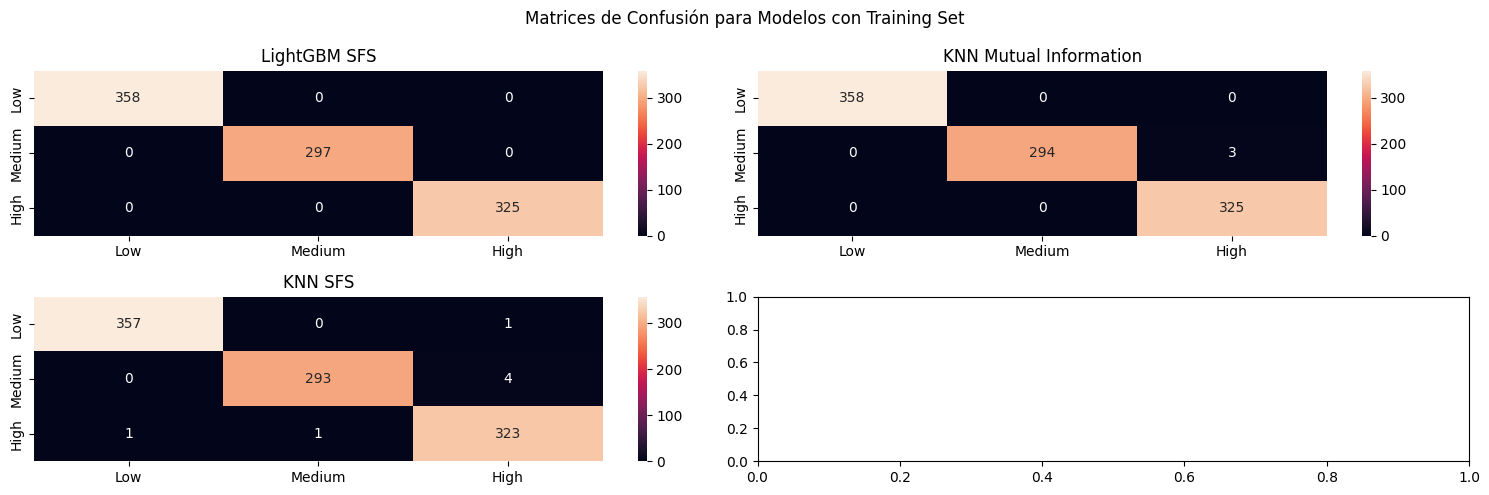

In [236]:
# matrices de confusion para los modelos de entrenamiento

modelos =['LightGBM SFS', 'KNN Mutual Information', 'KNN SFS']
labels=['Low','Medium','High']

fig,ax=plt.subplots(2,2,figsize=(15,5))
r=0
c=0
for i, model in enumerate(modelos):
    sns.heatmap(cm_t[i],annot=True,fmt='d',ax=ax[r][c],xticklabels=labels,yticklabels=labels)
    ax[r][c].set_title(model)
    c+=1
    if(c==2):
        r+=1
        c=0
plt.suptitle('Matrices de Confusión para Modelos con Training Set')
plt.tight_layout()
plt.show()

**_Matrices de Confusión para Test_** 

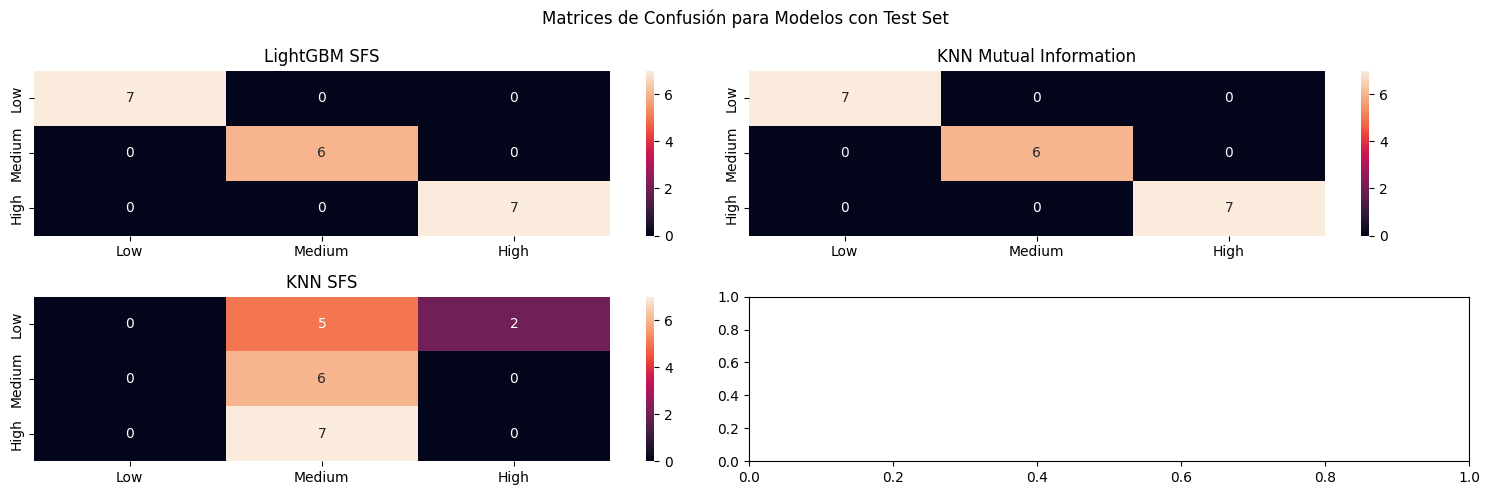

In [237]:
# matrices de confusion para los modelos de test

modelos =['LightGBM SFS', 'KNN Mutual Information', 'KNN SFS']
labels=['Low','Medium','High']

fig,ax=plt.subplots(2,2,figsize=(15,5))
r=0
c=0
for i, model in enumerate(modelos):
    sns.heatmap(cm[i],annot=True,fmt='d',ax=ax[r][c],xticklabels=labels,yticklabels=labels)
    ax[r][c].set_title(model)
    c+=1
    if(c==2):
        r+=1
        c=0
plt.suptitle('Matrices de Confusión para Modelos con Test Set')
plt.tight_layout()
plt.show()

### Décimo paso: Primeras Conclusiones

Conclusiones: cualquiera de los tres modelos con sus hiperparámetros optimizados o incluso sin optimizar dan muy buenos resultados, pero los dos mejores serían LightGBM con seleccion de features SFS, y luego el KNN Mutual Information.
Quizá porque es menos costoso a todos los niveles, me quedaría con el KNN seleccion de features Mutual Information.

*Como no estoy conforme con los resultados del proyecto ya que todo es demasiado perfecto, decido investigar un poco más acerca del dataset y sus variables.*

*Tras volver a ver con calma la página de donde saqué los datos y los comentarios de otros ususarios, me doy cuenta que dicho dataset parece ser sintético. De ahí que las métricas sean tan buenas y que otros usuarios hayan tenido unos resultados similares a los míos.*

*Decepcionada con mi elección del dataset y los resultados obtenidos, no voy a rendirme y voy a aportar más información y pruebas a este proyecto.*

### Extra: Buscando el mínimo número de Features para obtener buenas métricas

Ya que todo es tan perfecto, y por sugerencia del profesor, he decidido ampliar el proyecto, intentando buscar cuál sería el número mínimo de features con las que podría trabajar para obtener unas buenas métricas. Como objetivo me propongo tener un avg. recall de 0.70.

**_PCA_**

In [238]:
# Voy a aplicar una PCA y veo qué pasa

# Para la PCA necesito que las variables estén escaladas por lo que las recupero

pca = PCA() # instancio

X_train_pca = X_train_scalado
X_test_pca = X_test_scalado

y_train_pca = train_set[target]
y_test_pca = test_set[target]

pca.fit(X_train_pca, y_train_pca) # entreno el modelo con el PCA

PCA()

In [239]:
# Explicación de la varianza

pca.explained_variance_ratio_

array([0.39403328, 0.11834893, 0.08822447, 0.06552422, 0.05668537,
       0.05301996, 0.03456703, 0.02978727, 0.02661353, 0.02226066,
       0.02194124, 0.01809338, 0.01475345, 0.01229521, 0.00986061,
       0.00895621, 0.00680743, 0.0049377 , 0.00417781, 0.00368498,
       0.00292774, 0.001451  , 0.00104851])

------------------------------------------
Porcentaje de varianza explicada acumulada
------------------------------------------
[0.39403328 0.51238221 0.60060669 0.6661309  0.72281628 0.77583624
 0.81040326 0.84019053 0.86680406 0.88906472 0.91100596 0.92909934
 0.94385279 0.956148   0.96600861 0.97496483 0.98177226 0.98670996
 0.99088776 0.99457274 0.99750049 0.99895149 1.        ]


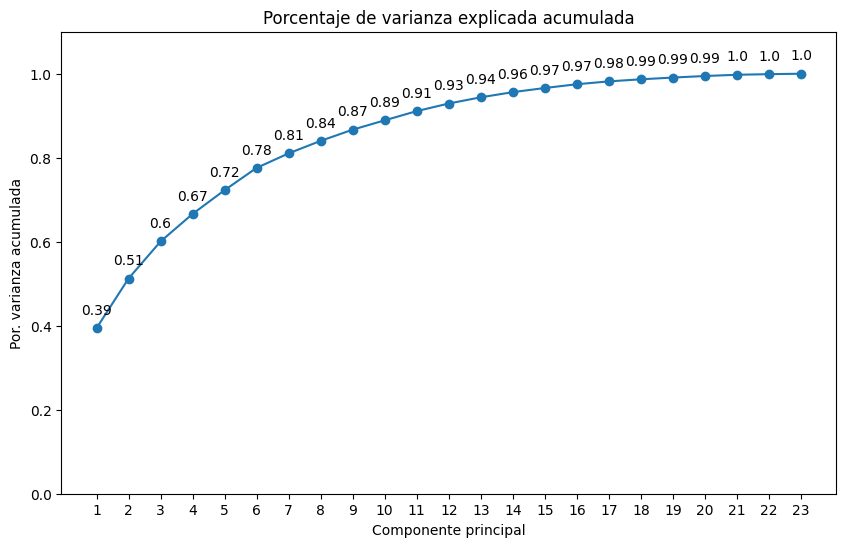

In [240]:
# Visto gráficamente

prop_varianza_acum = pca.explained_variance_ratio_.cumsum()

print('------------------------------------------')
print('Porcentaje de varianza explicada acumulada')
print('------------------------------------------')
print(prop_varianza_acum)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 6))
ax.plot(
    np.arange(len(X_train_scalado.columns)) + 1,
    prop_varianza_acum,
    marker = 'o'
)

for x, y in zip(np.arange(len(X_test_scalado.columns)) + 1, prop_varianza_acum):
    label = round(y, 2)
    ax.annotate(
        label,
        (x,y),
        textcoords="offset points",
        xytext=(0,10),
        ha='center'
    )
    
ax.set_ylim(0, 1.1)
ax.set_xticks(np.arange(pca.n_components_) + 1)
ax.set_title('Porcentaje de varianza explicada acumulada')
ax.set_xlabel('Componente principal')
ax.set_ylabel('Por. varianza acumulada');

In [241]:
# Según este selector de features si bajo de 4 features, el rendimiento no será tan bueno. Aún así he hecho comprobaciones y parece que con 4 aún da muy buenas métricas en general.
# Las métricas empiezana a empeorar cuando uso 2 features.

In [242]:
# Aplicación con los modelos que he obtenido anteriormente

X_train_pca_2 = pca.transform(X_train_pca)
X_test_pca_2 = pca.transform(X_test_pca)

# Primero con el LGBM SFS

lgb_clf_pca = LGBMClassifier(**lgb_grid.best_params_, verbose = -100)
lgb_clf_pca.fit(X_train_pca_2[:,:2], y_train) # uso 2 features
y_pred = lgb_clf_pca.predict(X_test_pca_2[:,:2]) # uso 2 features
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

        High       1.00      1.00      1.00         7
         Low       1.00      1.00      1.00         6
      Medium       1.00      1.00      1.00         7

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20



/Users/lauragarcia/.local/share/virtualenvs/lauragarcia-3NpKiQeF/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


In [243]:
# Ahora con el KNN Mutual Information

Knn_mi_clf_pca = KNeighborsClassifier(**knn_optimizado_mi.best_params_)
Knn_mi_clf_pca.fit(X_train_pca_2[:,:2], y_train) # uso 2 features
y_pred = Knn_mi_clf_pca.predict(X_test_pca_2[:,:2]) # uso 2 features
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

        High       1.00      1.00      1.00         7
         Low       1.00      1.00      1.00         6
      Medium       1.00      1.00      1.00         7

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20



In [244]:
# Ahora con el KNN SFS

nknn_clf_pca = KNeighborsClassifier(**knn_optimizado.best_params_)
nknn_clf_pca.fit(X_train_pca_2[:,:2], y_train) # uso 2 features
y_pred = nknn_clf_pca.predict(X_test_pca_2[:,:2]) # uso 2 features
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

        High       1.00      1.00      1.00         7
         Low       1.00      1.00      1.00         6
      Medium       1.00      1.00      1.00         7

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20



**_Selector por Umbral de Varianza_**

In [245]:
# Lo hago de otra manera

from sklearn.feature_selection import VarianceThreshold

umbral_varianza = 0.1 # he probado de 0.5-0.1 y varian un par de features (además por más que bajo no me salen menos)

var_selector = VarianceThreshold(umbral_varianza)
var_selector.fit(X_train)
print("Lista seleccionada para selector de Varianza", var_selector.get_feature_names_out())

Lista seleccionada para selector de Varianza ['Age' 'Gender' 'Air Pollution' 'Alcohol use' 'Dust Allergy'
 'OccuPational Hazards' 'Genetic Risk' 'chronic Lung Disease'
 'Balanced Diet' 'Obesity' 'Smoking' 'Passive Smoker' 'Chest Pain'
 'Coughing of Blood' 'Fatigue' 'Weight Loss' 'Shortness of Breath'
 'Wheezing' 'Swallowing Difficulty' 'Clubbing of Finger Nails'
 'Frequent Cold' 'Dry Cough' 'Snoring']


In [246]:
# Las meto en una variable

features_var = var_selector.get_feature_names_out()[:2] # me quedo sólo con las dos primeras
features_var


array(['Age', 'Gender'], dtype=object)

In [247]:
# Pruebo a pasarlas a los modelos
# Primero LGBM 

lgb_clf_var = LGBMClassifier(**lgb_grid.best_params_, verbose = -100)
lgb_clf_var.fit(X_train[features_var], y_train) 
y_pred = lgb_clf_var.predict(X_test[features_var]) 
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

        High       0.86      0.86      0.86         7
         Low       0.83      0.83      0.83         6
      Medium       0.86      0.86      0.86         7

    accuracy                           0.85        20
   macro avg       0.85      0.85      0.85        20
weighted avg       0.85      0.85      0.85        20



In [248]:
# Ahora con el KNN (Mutua Information)

Knn_mi_clf_var = KNeighborsClassifier(**knn_optimizado_mi.best_params_)
Knn_mi_clf_var.fit(X_train[features_var], y_train) 
y_pred = Knn_mi_clf_var.predict(X_test[features_var])
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

        High       0.75      0.86      0.80         7
         Low       0.67      0.67      0.67         6
      Medium       0.83      0.71      0.77         7

    accuracy                           0.75        20
   macro avg       0.75      0.75      0.75        20
weighted avg       0.75      0.75      0.75        20



In [249]:
# Finalmente con el KNN (SFS)

nknn_clf_pca = KNeighborsClassifier(**knn_optimizado.best_params_)
nknn_clf_pca.fit(X_train[features_var], y_train) 
y_pred = nknn_clf_pca.predict(X_test[features_var]) 
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

        High       0.75      0.86      0.80         7
         Low       0.67      0.67      0.67         6
      Medium       0.83      0.71      0.77         7

    accuracy                           0.75        20
   macro avg       0.75      0.75      0.75        20
weighted avg       0.75      0.75      0.75        20



In [250]:
# Curiosamente, las dos variables escogidas con el umbral de varianza son género y edad que a prioiri era descartada en muchas de las selecciones esscogidas anteriormente 
# y aún así, las métricas con esas cuatro únicas variables son bastante buenas.
# Cada vez estoy más convencida de que este dataset está preparado.

**_Selección de dos Features_**

Una vez visto que con dos features los modelos de predicción siguen saliendo bastante bien. Voy a seleccionar las 2 primeras features de cada grupo de selección y voy a volver a pasarle los modelos a ver qué pasa.

In [251]:
# Seleccionando las dos primeras features en cada selector

features_stad_sel = features_stad[:2]
features_mi_sel = features_mi[:2]
features_manual_sel = features_manual[:2]
features_modelo_sel = features_modelo[:2]
features_RFE_sel = features_RFE[:2]
features_SFS_sel = features_SFS[:2]
features_hard_voting_sel = features_hard_voting[:2]

In [252]:
# Las paso por los modelos 

In [253]:
# Empezamos con el modelado general.
# Aquí voy a ignorar la regresión lineal y el SVC por el tema del escalado, luego haré un proceso similar con estos dos modelos.

nombres = [f"Seleccion {nombre}" for nombre in ["estadistico", "mutual information", "manual", "modelo", "rfe", "sfs", "voting"]]
model_names = ["Random Forest", "KNN", " Decission Tree", "AdaBoost", "LightGBM", "Catboost"]

# Instanciamos los diferentes modelos de clasificación que voy a usar.

rf_clf = RandomForestClassifier(class_weight= "balanced", random_state= 42)
knn_clf = KNeighborsClassifier(weights= "uniform", n_jobs= -1)
dt_clf = DecisionTreeClassifier(class_weight = "balanced", random_state = 42) 
ada_clf = AdaBoostClassifier(random_state = 42)
lgb_clf = LGBMClassifier(class_weight= "balanced", random_state = 42, verbose = -100, n_jobs= -1)
cb_clf = CatBoostClassifier(random_state = 42)


models = [rf_clf, knn_clf, dt_clf, ada_clf, lgb_clf, cb_clf] # listado de modelos
resultados = [] # Lista donde almacenaremos los resultados de la métricaa de cada modelo con cada grupo de features usadas

# Realizamos prueba de validación cruzada

for indice, lista in enumerate([features_stad_sel, features_mi_sel, features_manual_sel, features_modelo_sel, features_RFE_sel, features_SFS_sel, features_hard_voting_sel]): # le pasamos el conjunto de dos features seleccionado de cada lista de features seleccionadas
    X_train_modelos = train_set[lista]
    y_train_modelos = y_train
    
    for model_name, modelo in zip(model_names, models):
        metrica = np.mean(cross_val_score(modelo, X_train_modelos, y_train_modelos, cv = 5, scoring = "balanced_accuracy")) # obtenemos la métrica de la valoración cruzada
        data = {
            "features_list": nombres[indice],
            "model": model_name,
            "avg. recall": metrica
        }
        print(data)
        resultados.append(data.copy())
df_resultados = pd.DataFrame(resultados) # paso los resultados a un dataframe
df_resultados.sort_values("avg. recall", ascending = False) # oredenamos de mejor a peor métrica

{'features_list': 'Seleccion estadistico', 'model': 'Random Forest', 'avg. recall': np.float64(0.8748674489352455)}
{'features_list': 'Seleccion estadistico', 'model': 'KNN', 'avg. recall': np.float64(0.8696248008112416)}
{'features_list': 'Seleccion estadistico', 'model': ' Decission Tree', 'avg. recall': np.float64(0.8748674489352455)}
{'features_list': 'Seleccion estadistico', 'model': 'AdaBoost', 'avg. recall': np.float64(0.8355053086397083)}
{'features_list': 'Seleccion estadistico', 'model': 'LightGBM', 'avg. recall': np.float64(0.879776908590468)}
Learning rate set to 0.078151
0:	learn: 1.0056689	total: 549us	remaining: 549ms
1:	learn: 0.9355756	total: 930us	remaining: 464ms
2:	learn: 0.8830273	total: 1.35ms	remaining: 447ms
3:	learn: 0.8261472	total: 1.82ms	remaining: 453ms
4:	learn: 0.7775090	total: 2.3ms	remaining: 457ms
5:	learn: 0.7343048	total: 2.75ms	remaining: 456ms
6:	learn: 0.6997931	total: 3.21ms	remaining: 456ms
7:	learn: 0.6698004	total: 3.59ms	remaining: 445ms
8:	l

features_list            model  avg. recall
6   Seleccion mutual information    Random Forest     0.935722
8   Seleccion mutual information   Decission Tree     0.935722
11  Seleccion mutual information         Catboost     0.935722
10  Seleccion mutual information         LightGBM     0.935722
7   Seleccion mutual information              KNN     0.923081
4          Seleccion estadistico         LightGBM     0.879777
40              Seleccion voting         LightGBM     0.879777
16              Seleccion manual         LightGBM     0.879777
2          Seleccion estadistico   Decission Tree     0.874867
0          Seleccion estadistico    Random Forest     0.874867
14              Seleccion manual   Decission Tree     0.874867
38              Seleccion voting   Decission Tree     0.874867
36              Seleccion voting    Random Forest     0.874867
12              Seleccion manual    Random Forest     0.874867
41              Seleccion voting         Catboost     0.874137
17              Seleccion manual         Catboost     0.874137
5          Seleccion estadistico         Catboost     0.874137
1          Seleccion estadistico              KNN     0.869625
13              Seleccion manual              KNN     0.869625
37              Seleccion voting              KNN     0.869625
39              Seleccion voting         AdaBoost     0.835505
3          Seleccion estadistico         AdaBoost     0.835505
15              Seleccion manual         AdaBoost     0.835505
22              Seleccion modelo         LightGBM     0.826651
20              Seleccion modelo   Decission Tree     0.821010
18              Seleccion modelo    Random Forest     0.821010
23              Seleccion modelo         Catboost     0.821010
19              Seleccion modelo              KNN     0.812325
26                 Seleccion rfe   Decission Tree     0.733874
24                 Seleccion rfe    Random Forest     0.733874
28                 Seleccion rfe         LightGBM     0.733874
29                 Seleccion rfe         Catboost     0.729650
27                 Seleccion rfe         AdaBoost     0.703844
25                 Seleccion rfe              KNN     0.698796
30                 Seleccion sfs    Random Forest     0.679418
32                 Seleccion sfs   Decission Tree     0.677742
34                 Seleccion sfs         LightGBM     0.672443
35                 Seleccion sfs         Catboost     0.665124
31                 Seleccion sfs              KNN     0.653226
21              Seleccion modelo         AdaBoost     0.646574
9   Seleccion mutual information         AdaBoost     0.635185
33                 Seleccion sfs         AdaBoost     0.479467

In [254]:
# Aquí ya podemos ver que algunos de los modelos con cierta selección de features ya bajan por debajo del 0.70. 
# De hecho el peor es Adaboost con la selección SFS que tendría un 0.47.
# Aún así, los cinco mejores modelos están por encima del 0.90, y todos ellos con la selección mutual information.

In [255]:
# Como curiosidad, voy a sacar el listado de las dos variables de mutual informatión que mejores resultados dan y las que peores resltados dan que son la selección SFS.

print(f'Las dos features que mejores resultados dan son {' y '.join(features_mi_sel)}')

Las dos features que mejores resultados dan son Passive Smoker y Coughing of Blood


In [256]:
print(f'Las dos features que peores resultados dan son {' y '.join(features_SFS_sel)}')

Las dos features que peores resultados dan son Age y Gender


In [257]:
# Voy a hacer el crossvalidation con la regresion lineal y el SVC

nombres = [f"Seleccion {nombre}" for nombre in ["estadistico", "mutual information", "manual", "modelo", "rfe", "sfs", "voting"]]
model_names_scaled = ["Logistic Regressor", "SVC"]

# Instanciamos los modelos

lr_clf = LogisticRegression(class_weight= "balanced", random_state= 42)
SVC_clf = SVC (class_weight = "balanced", random_state = 42)

models_scaled = [lr_clf, SVC_clf]
resultados_scaled = [] # listado de resultados de la métrica de valoración cruzada

for indice, lista in enumerate([features_stad_sel, features_mi_sel, features_manual_sel, features_modelo_sel, features_RFE_sel, features_SFS_sel, features_hard_voting_sel]): # listado con cada seleccion de dos features
    X_train_modelos_2 = X_train_scalado[lista]
    y_train_modelos_2 = y_train
    
    for model_name_scaled, modelo in zip(model_names_scaled, models_scaled):
        metrica = np.mean(cross_val_score(modelo, X_train_modelos_2, y_train_modelos_2, cv = 5, scoring = "balanced_accuracy")) # validadción cruzada
        data = {
            "features_list": nombres[indice],
            "model": model_name_scaled,
            "avg. recall": metrica
        }
        print(data)
        resultados_scaled.append(data.copy())
df_resultados_scaled = pd.DataFrame(resultados_scaled)
df_resultados_scaled.sort_values("avg. recall", ascending = False) # ordenamos de mejor a peor resultado

{'features_list': 'Seleccion estadistico', 'model': 'Logistic Regressor', 'avg. recall': np.float64(0.7527980078063631)}
{'features_list': 'Seleccion estadistico', 'model': 'SVC', 'avg. recall': np.float64(0.8720846008981603)}
{'features_list': 'Seleccion mutual information', 'model': 'Logistic Regressor', 'avg. recall': np.float64(0.6622169037208426)}
{'features_list': 'Seleccion mutual information', 'model': 'SVC', 'avg. recall': np.float64(0.9225423728813558)}
{'features_list': 'Seleccion manual', 'model': 'Logistic Regressor', 'avg. recall': np.float64(0.7527980078063631)}
{'features_list': 'Seleccion manual', 'model': 'SVC', 'avg. recall': np.float64(0.8720846008981603)}
{'features_list': 'Seleccion modelo', 'model': 'Logistic Regressor', 'avg. recall': np.float64(0.6851037141774787)}
{'features_list': 'Seleccion modelo', 'model': 'SVC', 'avg. recall': np.float64(0.6893242068665798)}
{'features_list': 'Seleccion rfe', 'model': 'Logistic Regressor', 'avg. recall': np.float64(0.5952

features_list               model  avg. recall
3   Seleccion mutual information                 SVC     0.922542
1          Seleccion estadistico                 SVC     0.872085
5               Seleccion manual                 SVC     0.872085
13              Seleccion voting                 SVC     0.872085
4               Seleccion manual  Logistic Regressor     0.752798
0          Seleccion estadistico  Logistic Regressor     0.752798
12              Seleccion voting  Logistic Regressor     0.752798
9                  Seleccion rfe                 SVC     0.730626
7               Seleccion modelo                 SVC     0.689324
6               Seleccion modelo  Logistic Regressor     0.685104
2   Seleccion mutual information  Logistic Regressor     0.662217
8                  Seleccion rfe  Logistic Regressor     0.595226
11                 Seleccion sfs                 SVC     0.498287
10                 Seleccion sfs  Logistic Regressor     0.426731

In [258]:
# Al igual que con los otros modelos, las métricas siguen siendo muy buenas con la selección de mutual information. Y las peores métricas en ambos modelos son con la selección SFS.

*Después de realizar una selección mínima de features usando la técnica del PCA, he visto que incluso con 2 features, las métricas de los modelos siguen siendo muy elevadas.* *Croncretamente las 5 mejores métricas están por encima del 0.92 usando la selección mutual information. Estas dos features son Coughing of Blood y Passive Smoker.*
*También es verdad que el modelo AdaBoost, junto con el Regresor Logístico y SVC son los peores parados en combinación con la seelección SFS. Sus métricas estarían muy por debajo del 0.7. Dichas features son edad y género.*
*En este caso, ambas dos variables son de las primeras en ser descartadas en la mayoria de procesos de selección de features o son las que menos importancia tienen. De hecho en el análisis visual ya lo apuntábamos.*
*Aún así, cuando he hecho el análisis de la varianza, son las dos variables que por umbral de varianzahan han sido seleccionadas, y los modelos seleccionados como los mejores, han sido capaces de sacar buenas métricas con ellas.*

### Conclusiones Finales ###

El dataset que he seleccionado, después de todas las pruebas realizadas y con los resultados obtenidos, puedo decir que es un dataset claramente sintético y preparado. Las métricas que se obtienen de los modelos, incluso en el peor de los casos que sería escogiendo erróneamente las dos features o por decirlo de otra manera, las que visualmente menos relación tienen con la target, nuestros modelos de predicción pueden llegar a tener métricas muy buenas.
Aunque para mí, llegar a estas conclusiones ha sido un poco decepcionante, puesto que pretendía que el proyecto fuera un buen impulso para mi futuro laboral, he sacado algunas conclusiones interesantes de toda la elaboración del proyecto.


### Conclusiones Personales ###

Debido a las circunstancias antes mencionadas en relación con el dataset que he escogido, he decidido añadir este apartado de conclusiones personales que creo que son destacadas y de cierta relevancia.
En líneas generales, debo ser más rigurosa a la hora de escoger un dataset para poder realizar un buen trabajo de investigación en *Machine Learning* y no sólo fiarme de las páginas con buena reputación.
Durante el desarrollo del proyecto, me he dado cuenta que utilizar todas las herramientas a nuestro alcance para la selección de features es muy importante, ya que cómo he podido comprobar, y a los hechos me remito, si sólo me hubiera quedado con las selección visual o la selección por umbral de varianza, habría tenido resultados muy dispares. Ya que cómo he mencionado anteriormente, para algunos selectores las features más importantes son las que a priori nos pudieron parecer que eran las que menos relevancia tenían. Aunque al final se ha ademostrado que son las que peores resultados daban al pasarlas por los modelos.
También es importante tener o escoger una buena batería de modelos con los que hacer nuestras pruebas y así tendremos multiples opciones al combinarlas con las diferentes selección de features y así poder escoger aquellos modelos que consideremos mejores. De hecho, no sólo debemos escogerlos porque nos den las mejores métricas, sino también porque a igualdad de métricas, sean menos costosos de lanzar o de mantener.
La optimización de hiperparámetros también nos ayuda a escoger ese modelo ideal y llegar a obtener unas métricas fantásticas.
Por último, y no menos importante, creo que el problema de este dataset, puede ser la estandarización de los valores de las features. 
En los campos de la medicina o la biología, las cosas no son o blancas o negras, siempre hay matices, y ese creo que es el problema. Voy a suponer que realmente existen unos datos detrás de cada uno de los valores de los síntomas o condiones particulares de cada uno de los pacientes, el problema creo que radica en la forma que han tenido de compactarlos o categorizarlos. Digo esto, porque no he encontrado por ningún sitio unos estándares para categorizar el dolor del pecho, o la tos seca, o el tabaquismo. De hecho, en la mayoria de casos esas consideraciones están basadas en 3-4 categorías como másivo (leve, moderado, severo), y aunque en algunos casos concretos como puede ser el alcoholismo o el tabaquismo que parece que si tienen algunas pautas más establecidas, como puede ser el número de bebidas alcoholicas que tomas a diario o los cigarrillos que fumas, el resto son muy interpretables. Incluso me llama la atención que el grado de obesidad de los pacientes esté categorizado en 7 niveles, cuando en realidad la OMS, como grados de obesidad tal cual sólo considera cinco. Quizá sólo sea una mala interpretación, porque incluya las categorias de bajo peso y normopeso, pero volveriamos al principio. Nos falta información sobre la categorización de las variables.
A pesar de todo, me llevo todo el aprendizaje que he obtenido realizando el trabajo, tanto a nivel de conocimientos personales de la materia médica, como de la aplicación del *Machine Learning* en la medicina ya que creo que es el futuro de nuestra salud y de nuestra sociedad.